In [142]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd #library for data manipulation and analysis
import numpy as np #library used for working with arrays
import matplotlib.pyplot as plt #library for plots and visualizations
import seaborn as sns #library for visualizations
from scipy.stats import norm #using normal distibutions
from scipy.stats import zscore

#Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split # Sklearn package's randomized data splitting function

#DEsision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import metrics

#Random Forest
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
import scipy.stats as stats
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score


#To install xgboost library use - !pip install xgboost 
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier



%matplotlib inline

pd.set_option('display.float_format', lambda x: '%.2f' % x) # To supress numerical display in scientific notations


import scipy.stats #library contains a number of probibility distributions and statistical functions

df = pd.read_csv('Tourism.csv')

df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.00,Self Enquiry,3,6.00,Salaried,Female,3,3.00,Deluxe,3.00,Single,1.00,1,2,1,0.00,Manager,20993.00
1,200001,0,49.00,Company Invited,1,14.00,Salaried,Male,3,4.00,Deluxe,4.00,Divorced,2.00,0,3,1,2.00,Manager,20130.00
2,200002,1,37.00,Self Enquiry,1,8.00,Free Lancer,Male,3,4.00,Basic,3.00,Single,7.00,1,3,0,0.00,Executive,17090.00
3,200003,0,33.00,Company Invited,1,9.00,Salaried,Female,2,3.00,Basic,3.00,Divorced,2.00,1,5,1,1.00,Executive,17909.00
4,200004,0,NaN,Self Enquiry,1,8.00,Small Business,Male,2,3.00,Basic,4.00,Divorced,1.00,0,5,1,0.00,Executive,18468.00


### Data Dictionary

- CustomerID: Unique customer ID
- ProdTaken: Whether the customer has purchased a package or not (0: No, 1: Yes)
- Age: Age of customer
- TypeofContact: How customer was contacted (Company Invited or Self Inquiry)
- CityTier: City tier depends on the development of a city, population, facilities, and living standards. The categories are ordered i.e. Tier 1 > Tier 2 > Tier 3. It's the city the customer lives in. 
- DurationOfPitch: Duration of the pitch by a salesperson to the customer
- Occupation: Occupation of customer
- Gender: Gender of customer
- NumberOfPersonVisiting: Total number of persons planning to take the trip with the customer
- NumberOfFollowups: Total number of follow-ups has been done by the salesperson after the sales pitch
- ProductPitched: Product pitched by the salesperson
- PreferredPropertyStar: Preferred hotel property rating by customer
- MaritalStatus: Marital status of customer
- NumberOfTrips: Average number of trips in a year by customer
- Passport: The customer has a passport or not (0: No, 1: Yes)
- PitchSatisfactionScore: Sales pitch satisfaction score
- OwnCar: Whether the customers own a car or not (0: No, 1: Yes)
- NumberOfChildrenVisiting: Total number of children with age less than 5 planning to take the trip with the customer
- Designation: Designation of the customer in the current organization
- MonthlyIncome: Gross monthly income of the customer

## Data Overview

In [143]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
CustomerID,4888.00,NaN,NaN,NaN,202443.50,1411.19,200000.00,201221.75,202443.50,203665.25,204887.00
ProdTaken,4888.00,NaN,NaN,NaN,0.19,0.39,0.00,0.00,0.00,0.00,1.00
Age,4662.00,NaN,NaN,NaN,37.62,9.32,18.00,31.00,36.00,44.00,61.00
TypeofContact,4863,2,Self Enquiry,3444,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CityTier,4888.00,NaN,NaN,NaN,1.65,0.92,1.00,1.00,1.00,3.00,3.00
DurationOfPitch,4637.00,NaN,NaN,NaN,15.49,8.52,5.00,9.00,13.00,20.00,127.00
Occupation,4888,4,Salaried,2368,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,4888,3,Male,2916,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumberOfPersonVisiting,4888.00,NaN,NaN,NaN,2.91,0.72,1.00,2.00,3.00,3.00,5.00
NumberOfFollowups,4843.00,NaN,NaN,NaN,3.71,1.00,1.00,3.00,4.00,4.00,6.00


In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [145]:
#Lets see the count and the percentage of missing values in each column
# selecting the instances where missing value is greater than 0
pd.DataFrame({'Count':df.isnull().sum()[df.isnull().sum()>0],'Percentage':(df.isnull().sum()[df.isnull().sum()>0]/df.shape[0])*100})



,Count,Percentage
Age,226,4.62
TypeofContact,25,0.51
DurationOfPitch,251,5.14
NumberOfFollowups,45,0.92
PreferredPropertyStar,26,0.53
NumberOfTrips,140,2.86
NumberOfChildrenVisiting,66,1.35
MonthlyIncome,233,4.77


In [146]:
df['TypeofContact'].value_counts(dropna=False)

Self Enquiry       3444
Company Invited    1419
NaN                  25
Name: TypeofContact, dtype: int64

In [147]:
df = df.dropna()

In [148]:
pd.DataFrame({'Count':df.isnull().sum()[df.isnull().sum()>0],'Percentage':(df.isnull().sum()[df.isnull().sum()>0]/df.shape[0])*100})


,Count,Percentage


In [149]:
#################################CHECK DUPLICATES
#check for duplicated rows
df.duplicated().sum()



0

In [150]:
df.drop(['CustomerID'],axis=1,inplace=True)

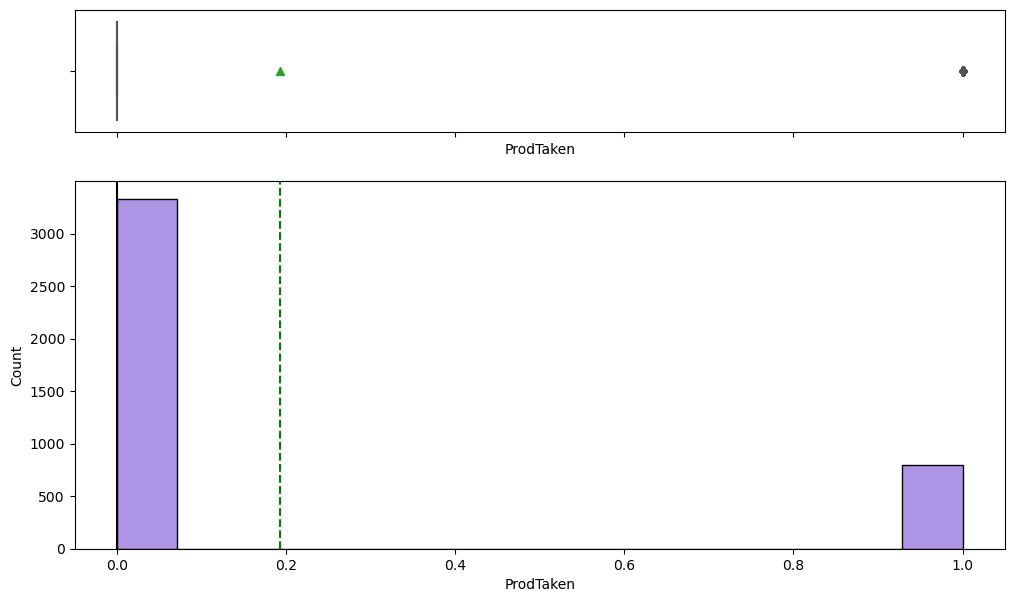

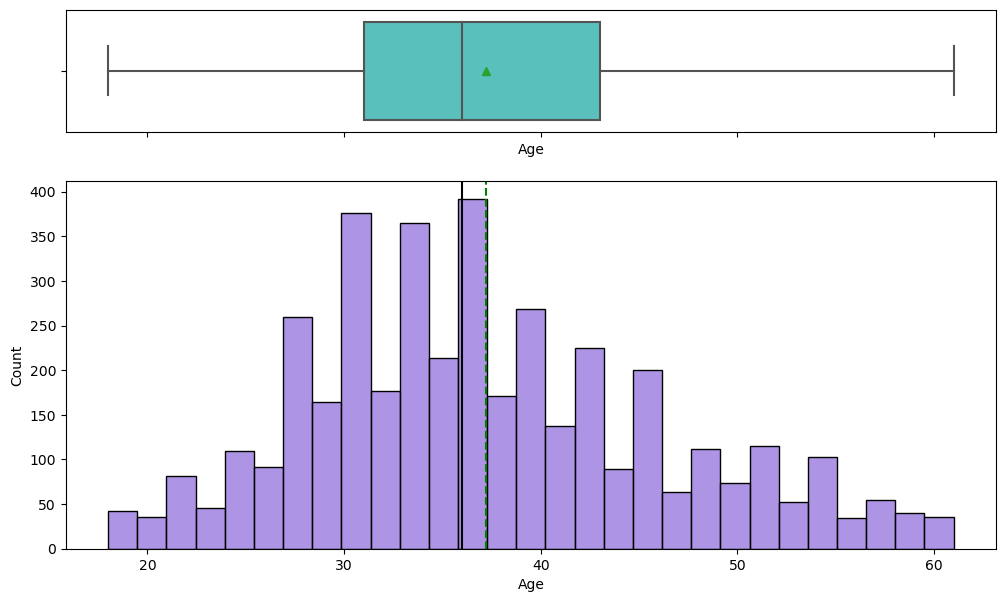

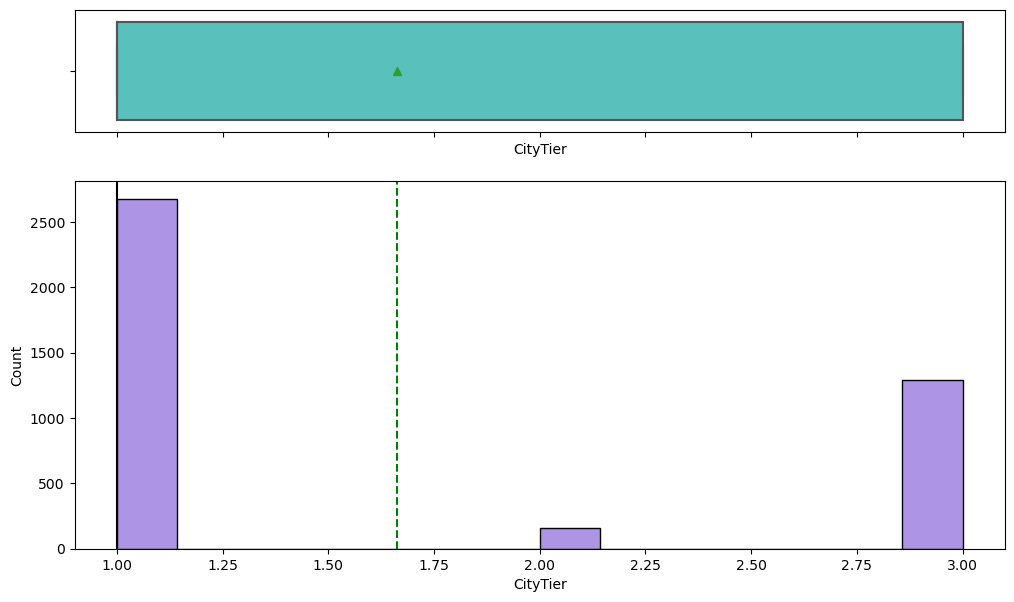

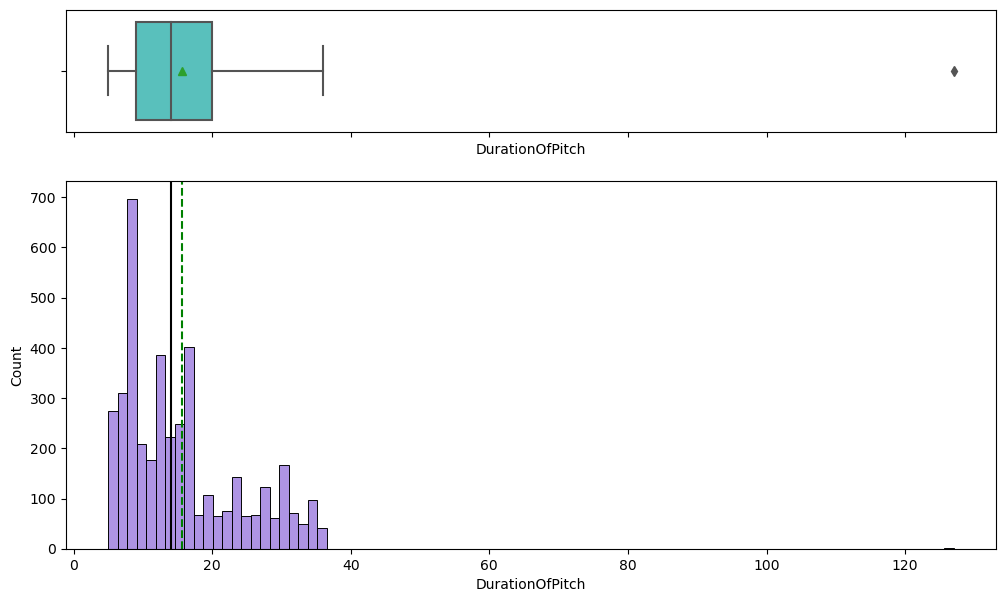

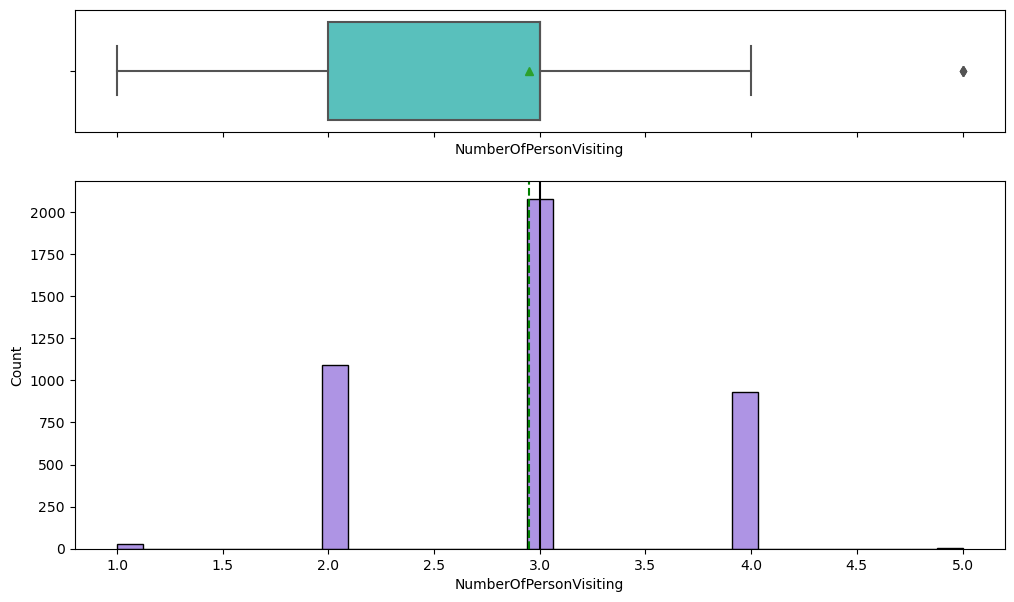

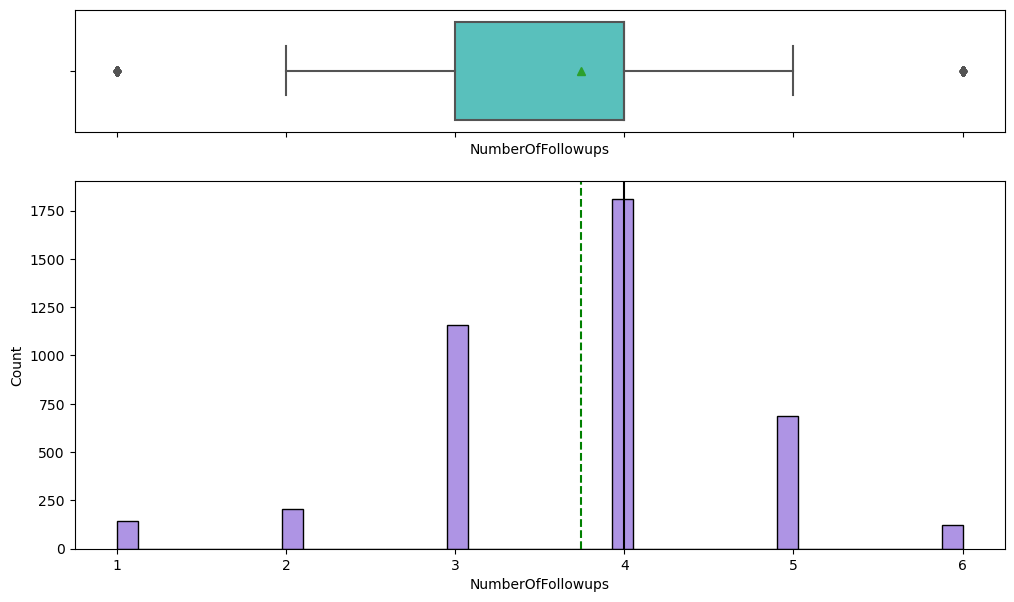

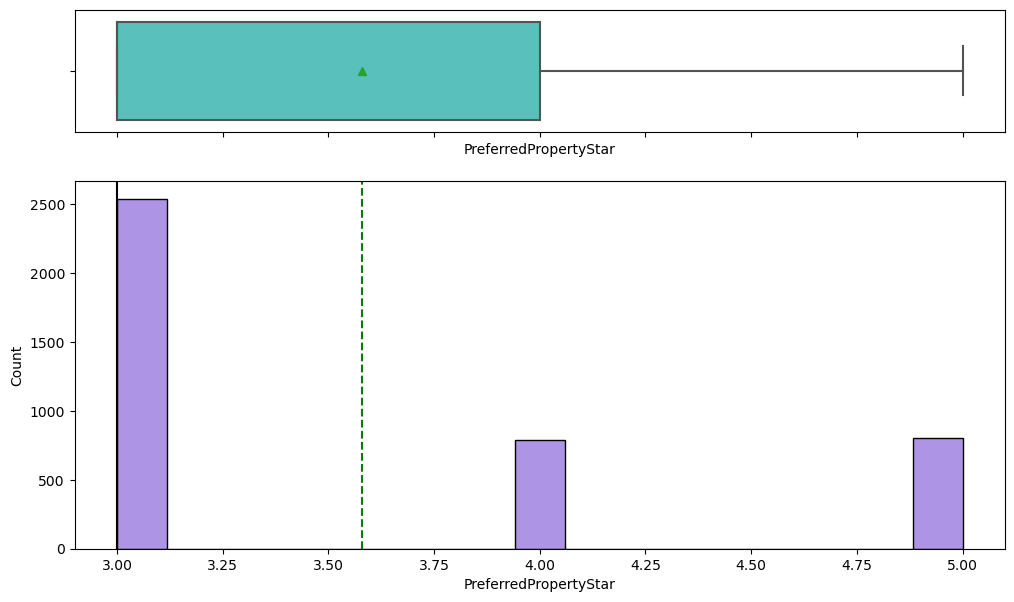

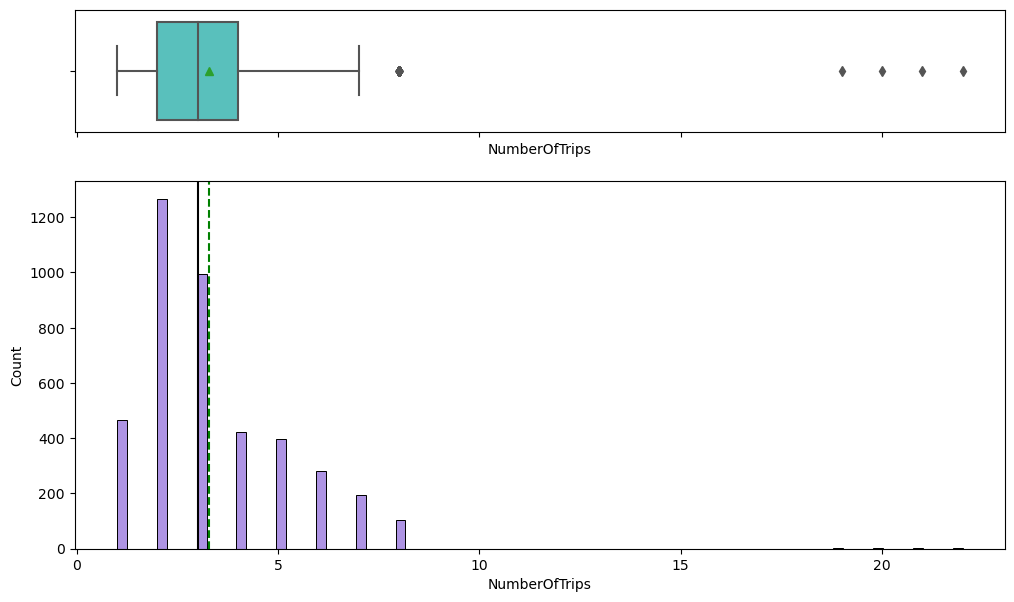

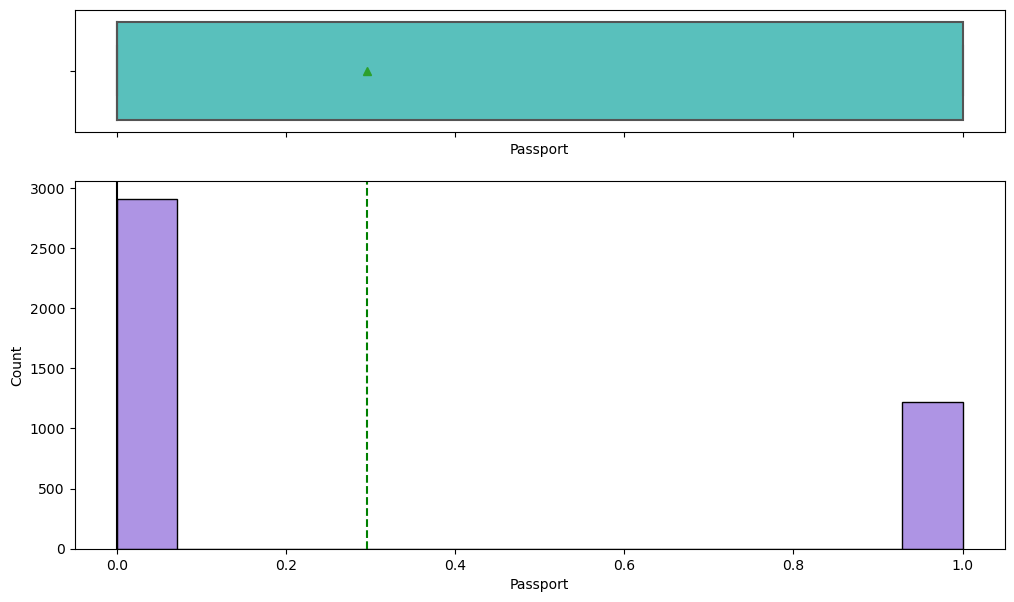

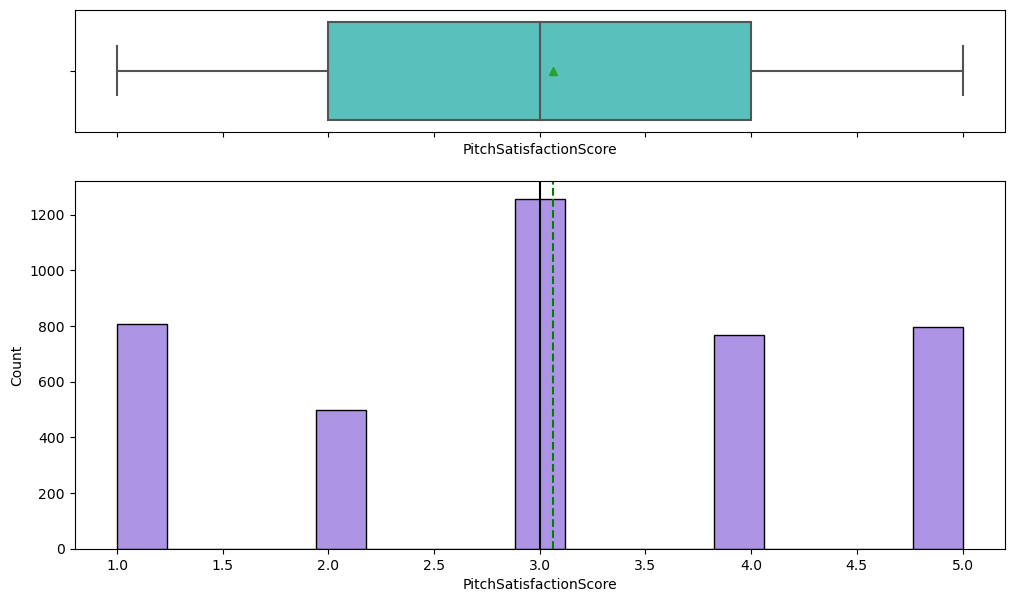

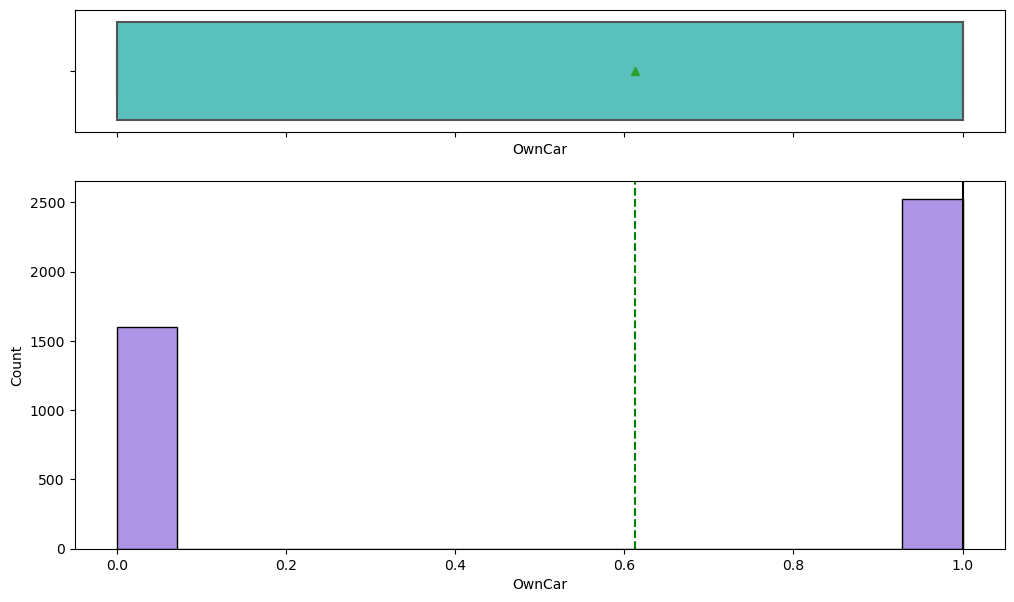

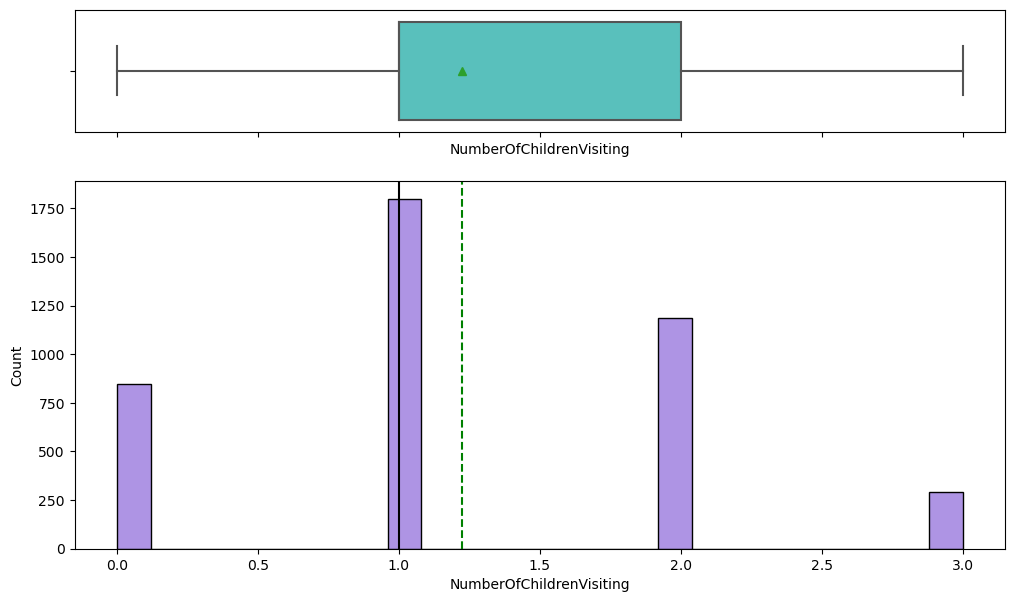

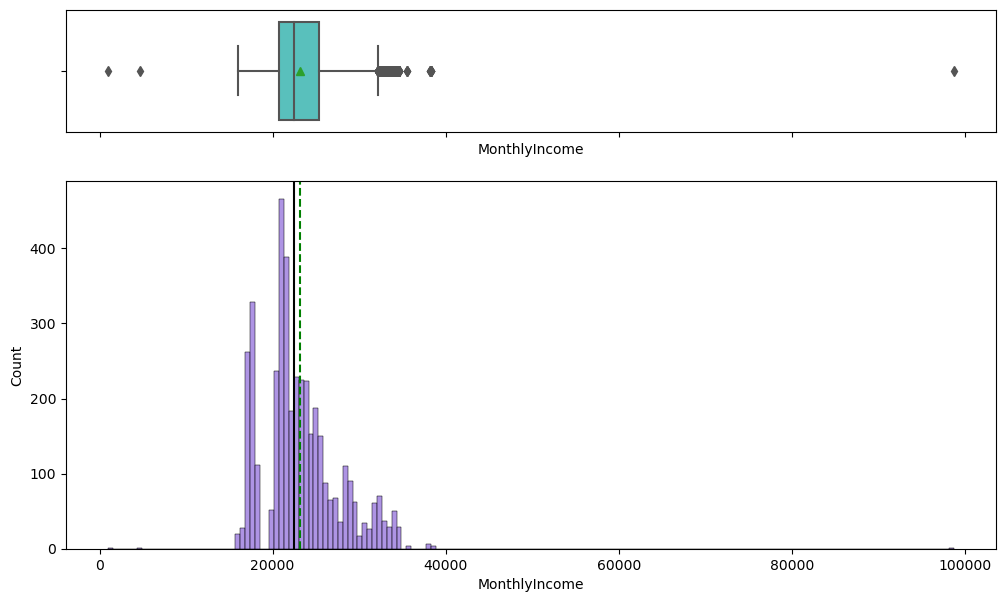

In [151]:

# Defining the function for creating boxplot and hisogram 
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize)  # creating the 2 subplots
    
    sns.boxplot(data=data, x=feature, ax=ax_box2, showmeans=True, color="mediumturquoise")  # boxplot will be created and a star will indicate the mean value of the column
    
    if bins:
      sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, color="mediumpurple")
    else: 
      sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2, color="mediumpurple")  # For histogram
    
    ax_hist2.axvline(data[feature].mean(), color="green", linestyle="--")  # Add mean to the histogram
    
    ax_hist2.axvline(data[feature].median(), color="black", linestyle="-")  # Add median to the histogram



columns_list = []

for i in df.columns:
    if df.dtypes[i]!=object:
        columns_list.append(i)

for i in columns_list:
    histogram_boxplot(df,i)  #you can't use this part without the defined functions

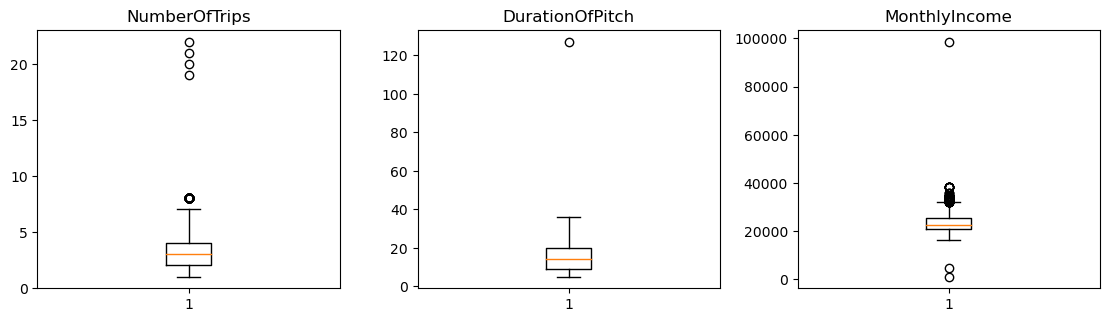

NumberOfTrips     2.59
DurationOfPitch   0.02
MonthlyIncome     5.40
dtype: float64

In [152]:
############################Treating outliers



# outlier detection using boxplot - UNIVARIATE FIRST
# selecting the numerical columns of data and adding their names in a list 
numeric_columns = ['NumberOfTrips', 'DurationOfPitch', 'MonthlyIncome']
plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()


#IQR

# to find the 25th percentile and 75th percentile for the numerical columns.
Q1 = df[numeric_columns].quantile(0.25)
Q3 = df[numeric_columns].quantile(0.75)

IQR = Q3 - Q1                   #Inter Quantile Range (75th percentile - 25th percentile)

lower_whisker = Q1 - 1.5*IQR    #Finding lower and upper bounds for all values. All values outside these bounds are outliers
upper_whisker = Q3 + 1.5*IQR

# Percentage of outliers in each column
((df[numeric_columns] < lower_whisker) | (df[numeric_columns] > upper_whisker)).sum()/df.shape[0]*100

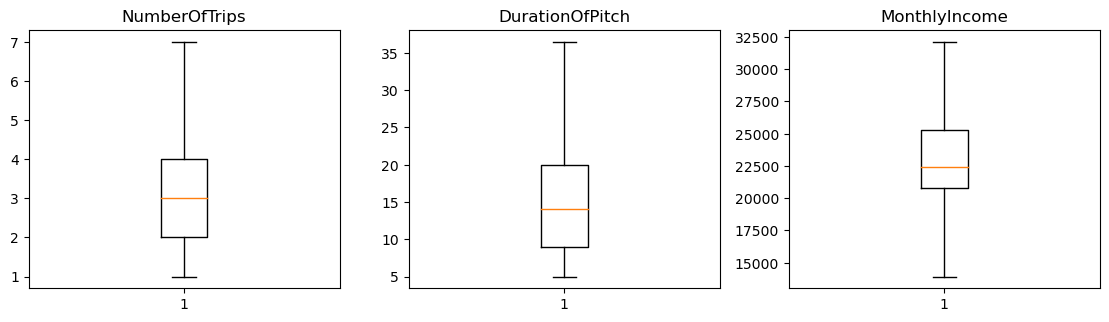

In [153]:
def treat_outliers(df, col):
    """
    treats outliers in a variable
    col: str, name of the numerical variable
    df: dataframe
    col: name of the column
    """
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1                # Inter Quantile Range (75th perentile - 25th percentile)
    lower_whisker = Q1 - 1.5 * IQR
    upper_whisker = Q3 + 1.5 * IQR

    # all the values smaller than lower_whisker will be assigned the value of lower_whisker
    # all the values greater than upper_whisker will be assigned the value of upper_whisker
    # the assignment will be done by using the clip function of NumPy
    df[col] = np.clip(df[col], lower_whisker, upper_whisker)

    return df

#check the outliers

#Treating outliers in Rooms column

df = treat_outliers(df,'NumberOfTrips')
df = treat_outliers(df,'DurationOfPitch')
df = treat_outliers(df,'MonthlyIncome')

# visualizing the column after outlier treatment
# outlier detection using boxplot
# selecting the numerical columns where outliers were treated 
numeric_columns = ['NumberOfTrips', 'DurationOfPitch', 'MonthlyIncome']
plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4128 entries, 0 to 4887
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ProdTaken                 4128 non-null   int64  
 1   Age                       4128 non-null   float64
 2   TypeofContact             4128 non-null   object 
 3   CityTier                  4128 non-null   int64  
 4   DurationOfPitch           4128 non-null   float64
 5   Occupation                4128 non-null   object 
 6   Gender                    4128 non-null   object 
 7   NumberOfPersonVisiting    4128 non-null   int64  
 8   NumberOfFollowups         4128 non-null   float64
 9   ProductPitched            4128 non-null   object 
 10  PreferredPropertyStar     4128 non-null   float64
 11  MaritalStatus             4128 non-null   object 
 12  NumberOfTrips             4128 non-null   float64
 13  Passport                  4128 non-null   int64  
 14  PitchSat

In [155]:
df.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,41.00,Self Enquiry,3,6.00,Salaried,Female,3,3.00,Deluxe,3.00,Single,1.00,1,2,1,0.00,Manager,20993.00
1,0,49.00,Company Invited,1,14.00,Salaried,Male,3,4.00,Deluxe,4.00,Divorced,2.00,0,3,1,2.00,Manager,20130.00
2,1,37.00,Self Enquiry,1,8.00,Free Lancer,Male,3,4.00,Basic,3.00,Single,7.00,1,3,0,0.00,Executive,17090.00
3,0,33.00,Company Invited,1,9.00,Salaried,Female,2,3.00,Basic,3.00,Divorced,2.00,1,5,1,1.00,Executive,17909.00
5,0,32.00,Company Invited,1,8.00,Salaried,Male,3,3.00,Basic,3.00,Single,1.00,0,5,1,1.00,Executive,18068.00


In [156]:
df.loc[df['Gender'] == 'Fe Male', 'Gender'] = 'Female'
df["Gender"].unique()

array(['Female', 'Male'], dtype=object)

**Questions**:

1. What is the distribution of the monthly income of customers? Are there any noticeable patterns or outliers in the distribution?
2. Which travel package is pitched the most by the salespersons to the customers?
3. How are the different customer attributes correlated to each other?
4. How does a customer's interest in purchasing the newly introduced travel package vary with their occupation?
5. How does a customer's interest in purchasing the newly introduced travel package vary with their marital status?

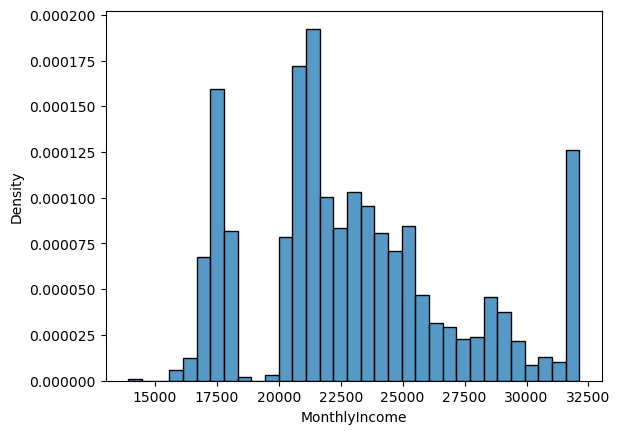

In [157]:
sns.histplot(data=df,x='MonthlyIncome',stat='density')
plt.show()

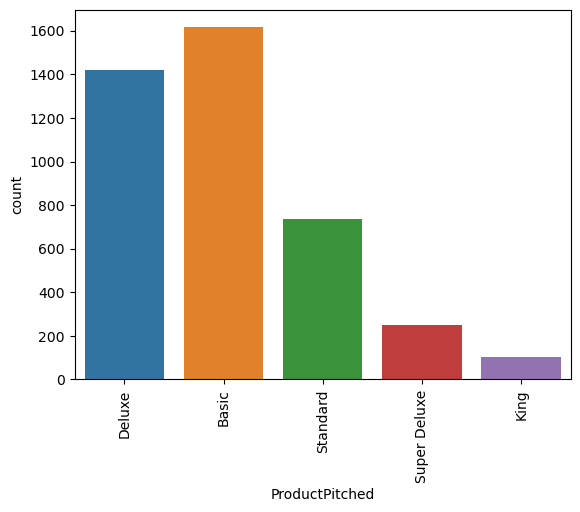

In [158]:



sns.countplot(data=df,x='ProductPitched')
plt.xticks(rotation=90)
plt.show()

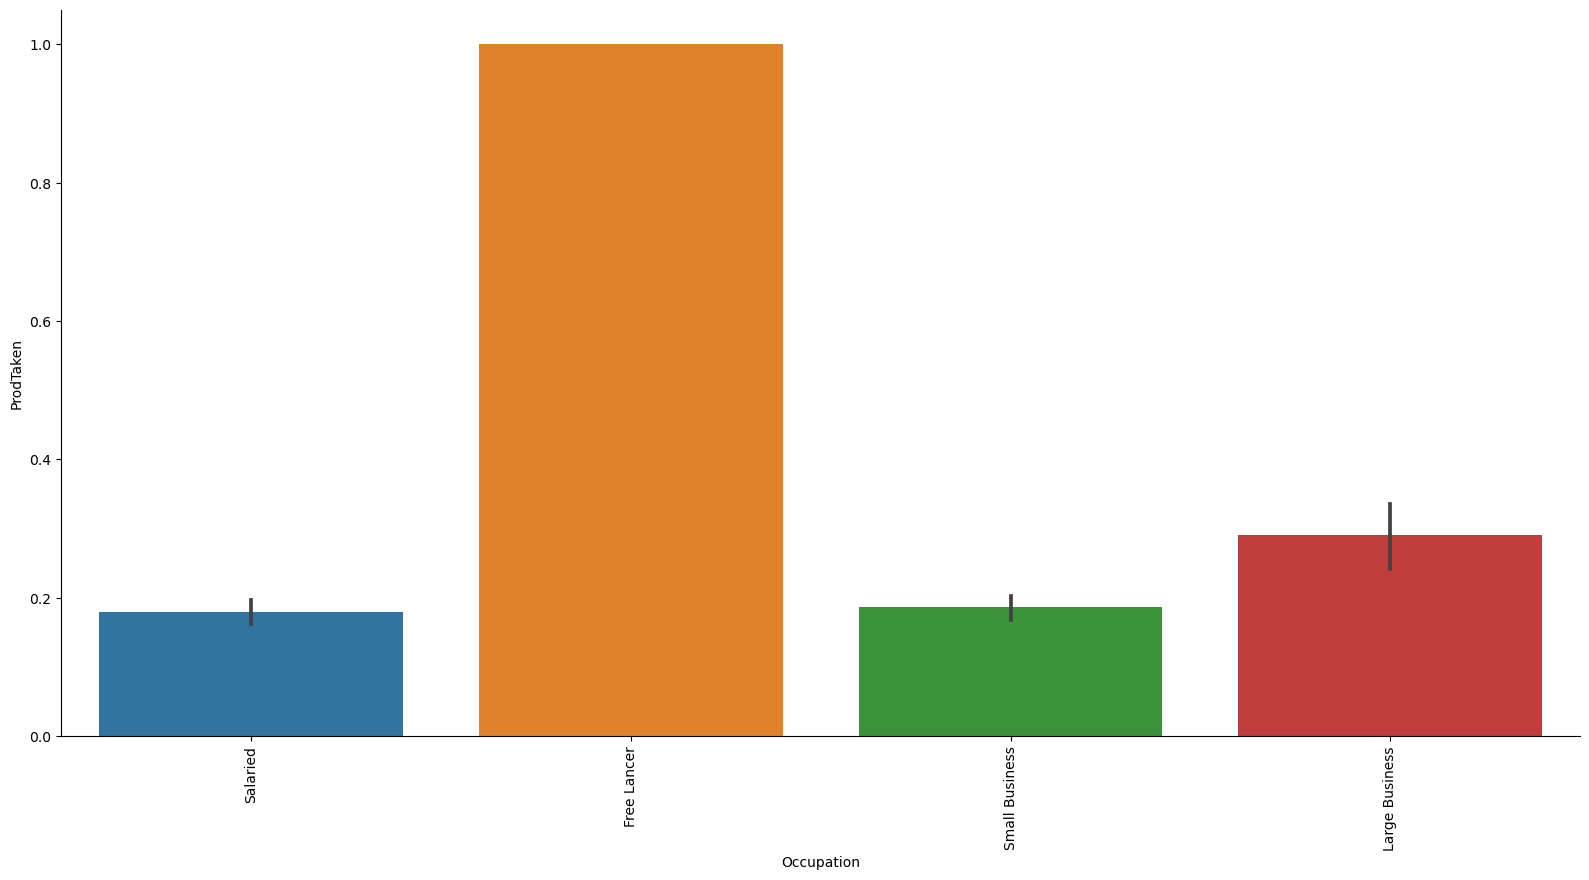

In [159]:


sns.catplot(x='Occupation', y='ProdTaken', data=df, kind="bar", height=8, aspect=2)
plt.xticks(rotation=90)
plt.show()

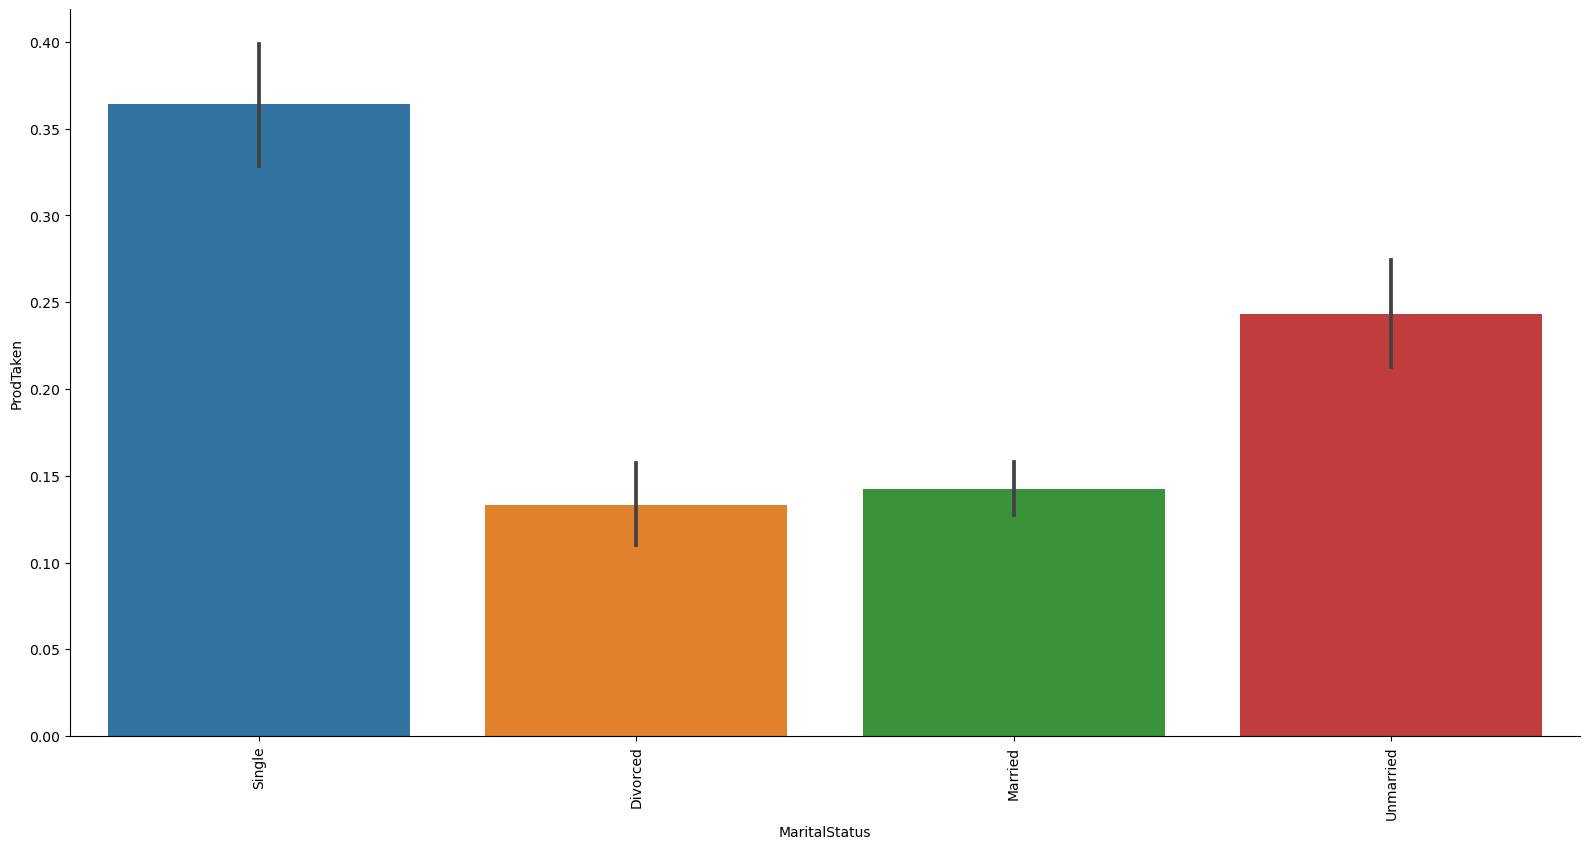

In [160]:
sns.catplot(x='MaritalStatus', y='ProdTaken', data=df, kind="bar", height=8, aspect=2)
plt.xticks(rotation=90)
plt.show()

### Observations

1. Monthly income has a bimodal distribution
2. The Basic travel package is pitched the most followed by Deluxe
3. Freelancers seem to be the most interested in taking products Occupation wise.
4. Single people take packages the most followed by Unmarried people.

In [161]:
################################. Create Dummy variables

#below redefining buckets for each case
replaceStruct = {
                "Gender":     {"Female": 1, "Male": 0}
                    }
oneHotCols=["TypeofContact","Occupation","ProductPitched","MaritalStatus", "Designation"]


#reassign the values in the dataframe

df=df.replace(replaceStruct)
df=pd.get_dummies(df, columns=oneHotCols)
df.head(10)

,ProdTaken,Age,CityTier,DurationOfPitch,Gender,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,...,ProductPitched_Super Deluxe,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Unmarried,Designation_AVP,Designation_Executive,Designation_Manager,Designation_Senior Manager,Designation_VP
0,1,41.00,3,6.00,1,3,3.00,3.00,1.00,1,...,0,0,0,1,0,0,0,1,0,0
1,0,49.00,1,14.00,0,3,4.00,4.00,2.00,0,...,0,1,0,0,0,0,0,1,0,0
2,1,37.00,1,8.00,0,3,4.00,3.00,7.00,1,...,0,0,0,1,0,0,1,0,0,0
3,0,33.00,1,9.00,1,2,3.00,3.00,2.00,1,...,0,1,0,0,0,0,1,0,0,0
5,0,32.00,1,8.00,0,3,3.00,3.00,1.00,0,...,0,0,0,1,0,0,1,0,0,0
6,0,59.00,1,9.00,1,2,2.00,5.00,5.00,1,...,0,1,0,0,0,0,1,0,0,0
7,0,30.00,1,30.00,0,3,3.00,3.00,2.00,0,...,0,0,1,0,0,0,1,0,0,0
8,0,38.00,1,29.00,0,2,4.00,3.00,1.00,0,...,0,0,0,0,1,0,0,0,1,0
9,0,36.00,1,33.00,0,3,3.00,3.00,7.00,0,...,0,1,0,0,0,0,0,1,0,0
10,0,35.00,1,22.00,0,2,2.00,4.00,1.00,0,...,0,1,0,0,0,0,1,0,0,0


In [162]:
# looking at value counts for non-numeric features

num_to_display = 10  # defining this up here so it's easy to change later if I want
for colname in df.dtypes[df.dtypes == 'object'].index:
    val_counts = df[colname].value_counts(dropna=False)  # i want to see NA counts
    print(val_counts[:num_to_display])
    if len(val_counts) > num_to_display:
        print(f'Only displaying first {num_to_display} of {len(val_counts)} values.')
    print('\n\n') # just for more space between 

In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4128 entries, 0 to 4887
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ProdTaken                      4128 non-null   int64  
 1   Age                            4128 non-null   float64
 2   CityTier                       4128 non-null   int64  
 3   DurationOfPitch                4128 non-null   float64
 4   Gender                         4128 non-null   int64  
 5   NumberOfPersonVisiting         4128 non-null   int64  
 6   NumberOfFollowups              4128 non-null   float64
 7   PreferredPropertyStar          4128 non-null   float64
 8   NumberOfTrips                  4128 non-null   float64
 9   Passport                       4128 non-null   int64  
 10  PitchSatisfactionScore         4128 non-null   int64  
 11  OwnCar                         4128 non-null   int64  
 12  NumberOfChildrenVisiting       4128 non-null   f

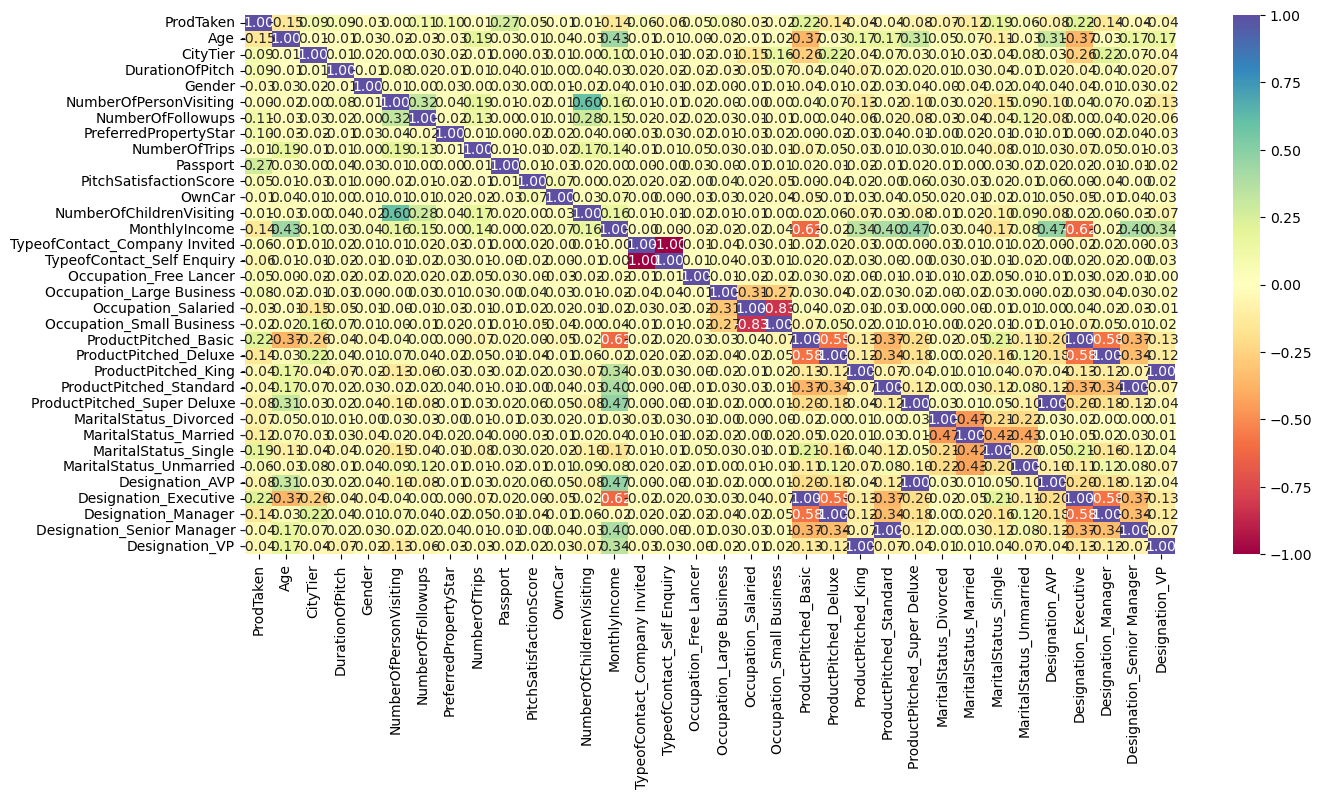

In [164]:
# plot the heatmap

corr = df.corr()

plt.figure(figsize=(15, 7))
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

In [165]:
import pandas as pd
pd.set_option('display.max_rows', None)

# Create correlation matrix
corr_mat = df.corr(method='pearson')

# Drop correlations where the variable names are the same
corr_mat = corr_mat.mask(np.tril(np.ones_like(corr_mat, dtype=bool)))

# Convert correlation matrix to 1-D Series and sort
sorted_mat = corr_mat.unstack().drop_duplicates().sort_values()

# Remove correlations with a value of 1 or null values
sorted_mat = sorted_mat[(sorted_mat != 1) & (~sorted_mat.isnull())]

print(sorted_mat)

TypeofContact_Self Enquiry     TypeofContact_Company Invited   -1.00
Occupation_Small Business      Occupation_Salaried             -0.83
ProductPitched_Basic           MonthlyIncome                   -0.62
Designation_Executive          ProductPitched_Deluxe           -0.58
ProductPitched_Deluxe          ProductPitched_Basic            -0.58
MaritalStatus_Married          MaritalStatus_Divorced          -0.47
MaritalStatus_Unmarried        MaritalStatus_Married           -0.43
MaritalStatus_Single           MaritalStatus_Married           -0.42
ProductPitched_Standard        ProductPitched_Basic            -0.37
Designation_Executive          ProductPitched_Standard         -0.37
ProductPitched_Basic           Age                             -0.37
ProductPitched_Standard        ProductPitched_Deluxe           -0.34
Occupation_Salaried            Occupation_Large Business       -0.31
Occupation_Small Business      Occupation_Large Business       -0.27
ProductPitched_Basic           Cit

In [166]:
# Libraries to build decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
#     plot_confusion_matrix,
    make_scorer,
)

In [167]:
X = df.drop(["ProdTaken"], axis=1)
y = df["ProdTaken"]

In [168]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [169]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 2889
Number of rows in test data = 1239


In [170]:
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Percentage of classes in training set:
0   0.81
1   0.19
Name: ProdTaken, dtype: float64
Percentage of classes in test set:
0   0.80
1   0.20
Name: ProdTaken, dtype: float64


In [171]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf


def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [172]:


####Building classifier

model = DecisionTreeClassifier(criterion="gini", random_state=1)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [173]:

######. Creating a decision tree model

decision_tree_perf_train = model_performance_classification_sklearn(
    model, X_train, y_train
)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,1.00,1.00,1.00,1.00


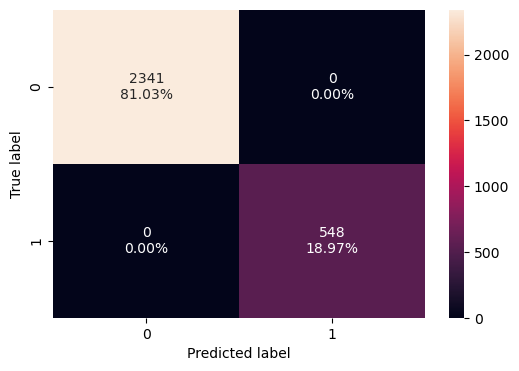

In [174]:
confusion_matrix_sklearn(model, X_train, y_train)

In [175]:
decision_tree_perf_test = model_performance_classification_sklearn(
    model, X_test, y_test
)
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.90,0.76,0.76,0.76


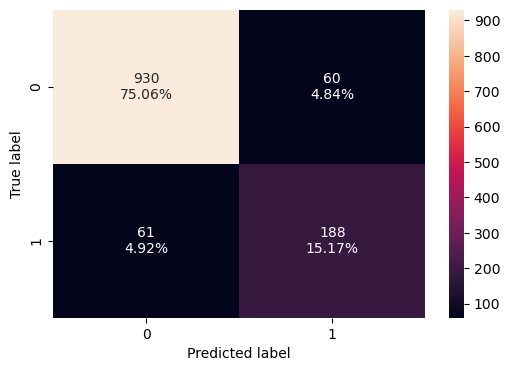

In [176]:
confusion_matrix_sklearn(model, X_test, y_test)

In [177]:
column_names = list(X.columns)
feature_names = column_names
print(feature_names)

['Age', 'CityTier', 'DurationOfPitch', 'Gender', 'NumberOfPersonVisiting', 'NumberOfFollowups', 'PreferredPropertyStar', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar', 'NumberOfChildrenVisiting', 'MonthlyIncome', 'TypeofContact_Company Invited', 'TypeofContact_Self Enquiry', 'Occupation_Free Lancer', 'Occupation_Large Business', 'Occupation_Salaried', 'Occupation_Small Business', 'ProductPitched_Basic', 'ProductPitched_Deluxe', 'ProductPitched_King', 'ProductPitched_Standard', 'ProductPitched_Super Deluxe', 'MaritalStatus_Divorced', 'MaritalStatus_Married', 'MaritalStatus_Single', 'MaritalStatus_Unmarried', 'Designation_AVP', 'Designation_Executive', 'Designation_Manager', 'Designation_Senior Manager', 'Designation_VP']


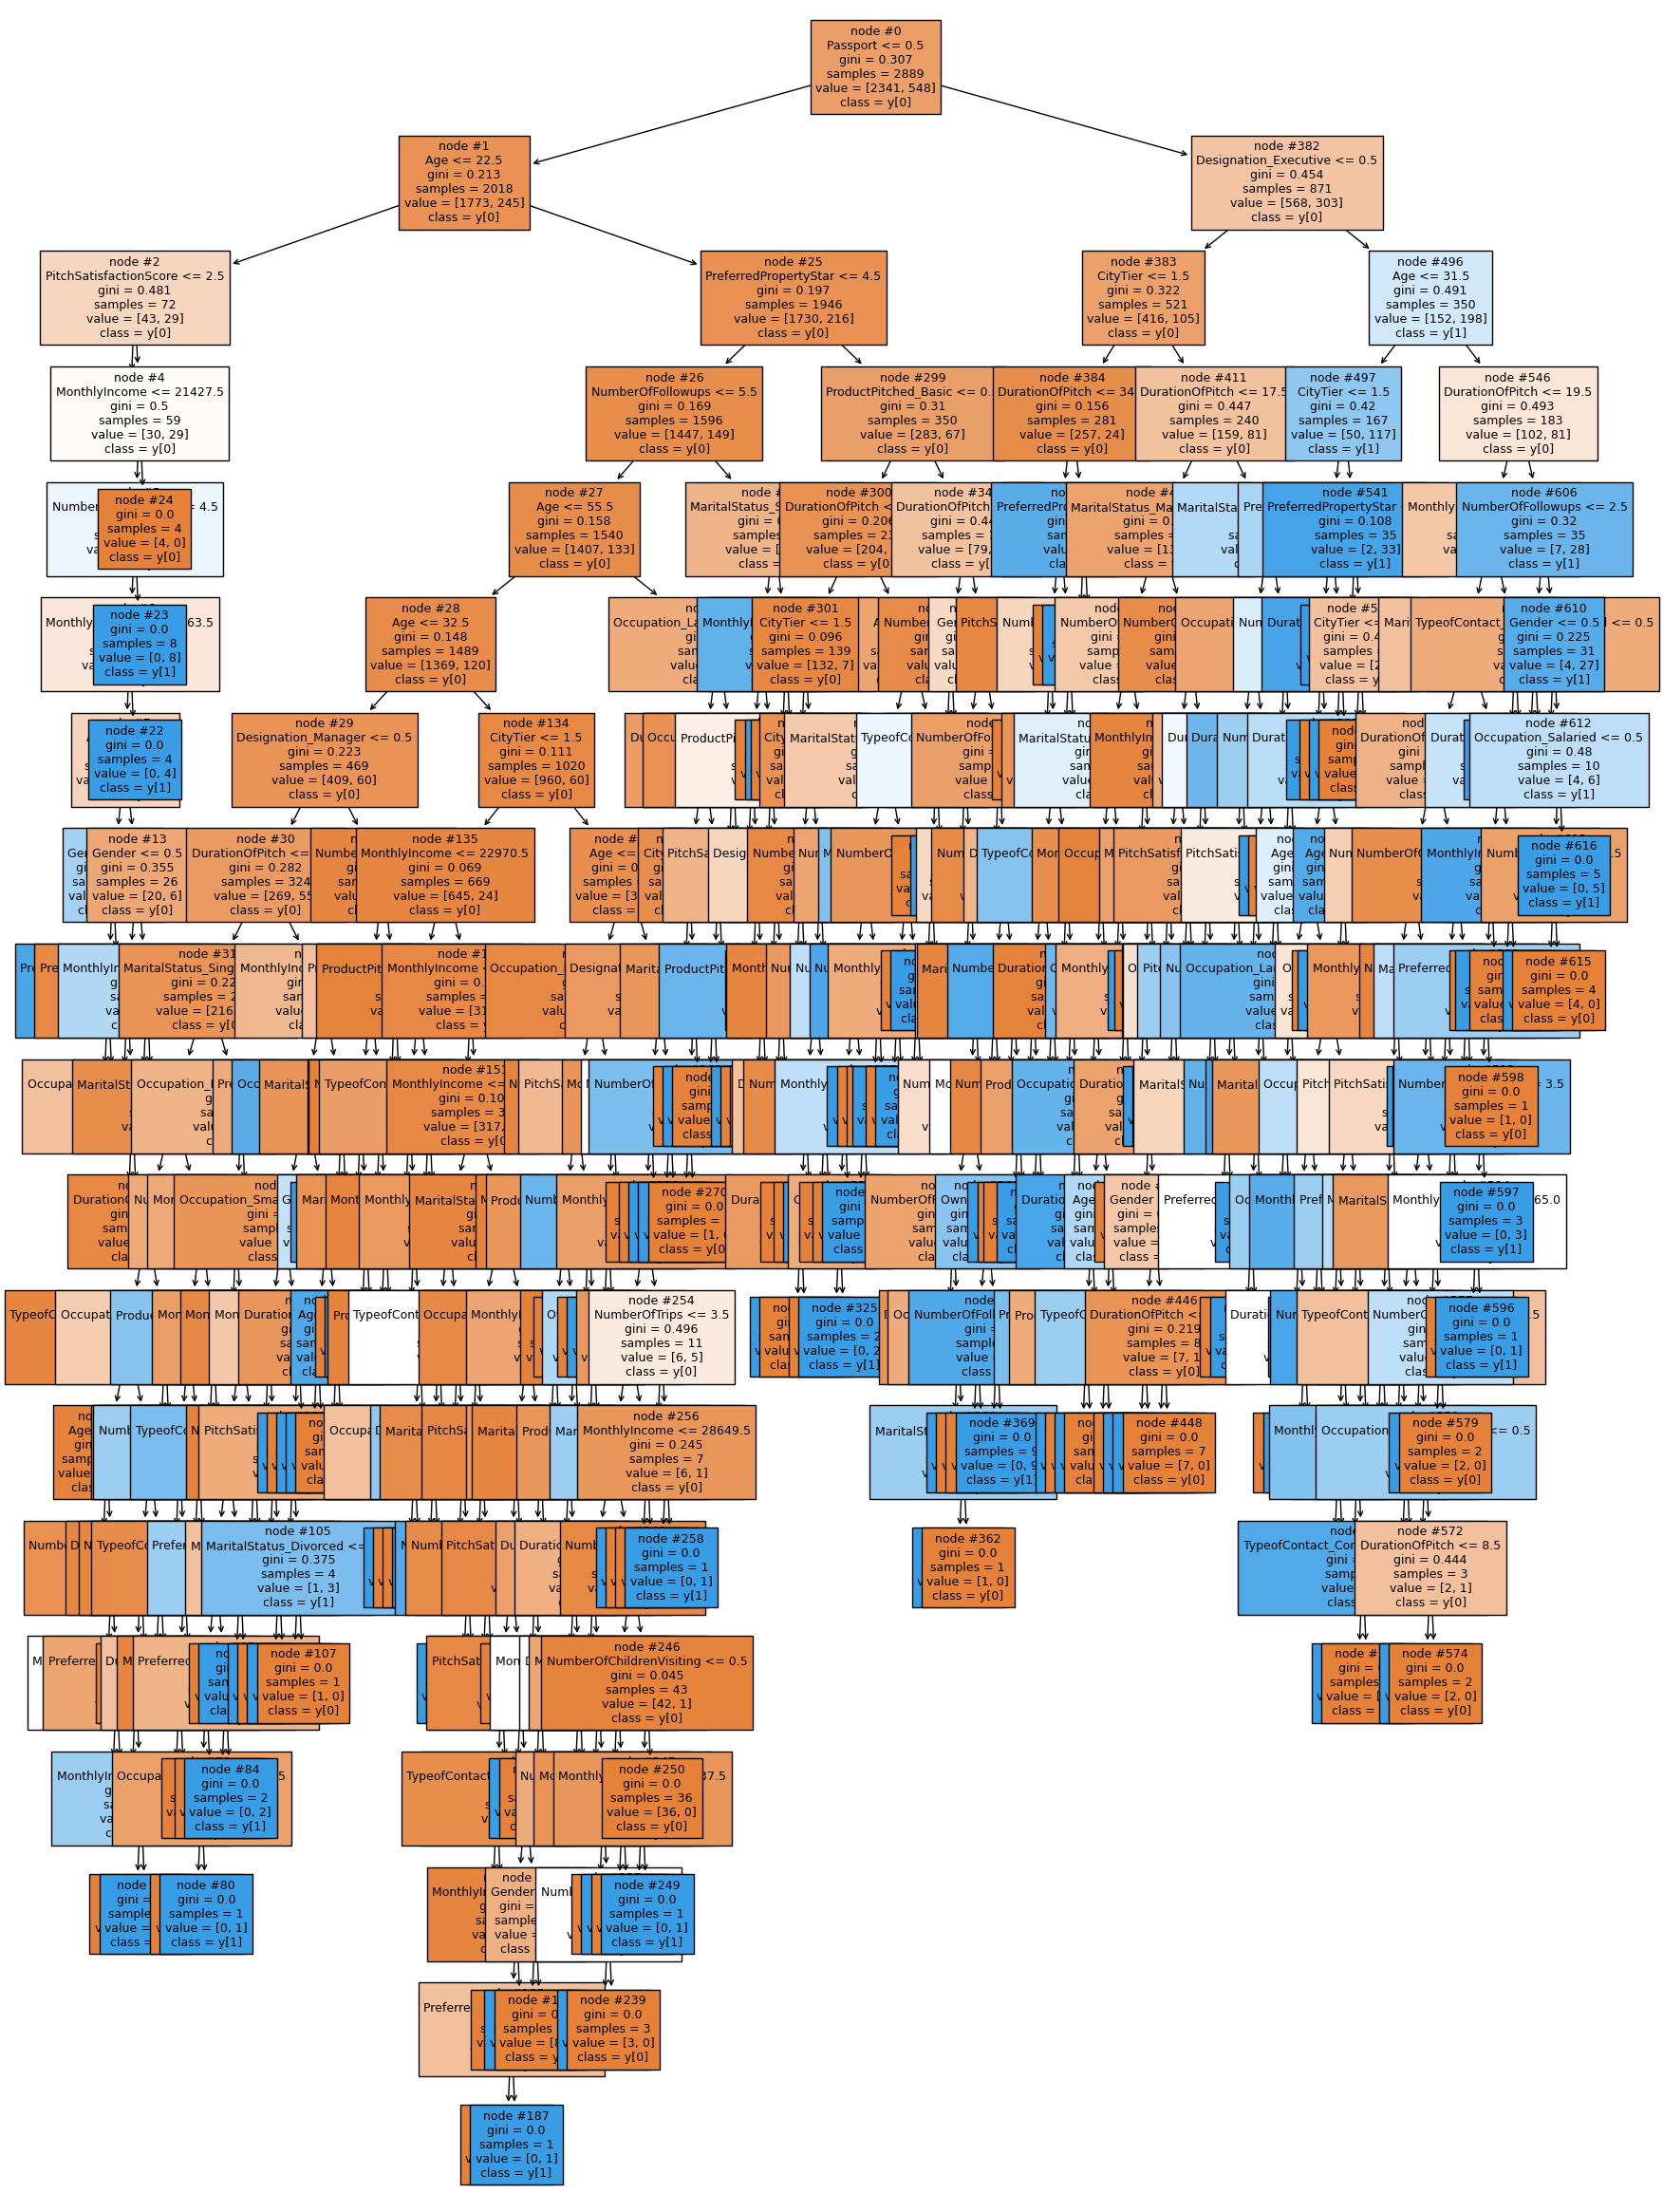

In [178]:
plt.figure(figsize=(20, 30))

out = tree.plot_tree(
    model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

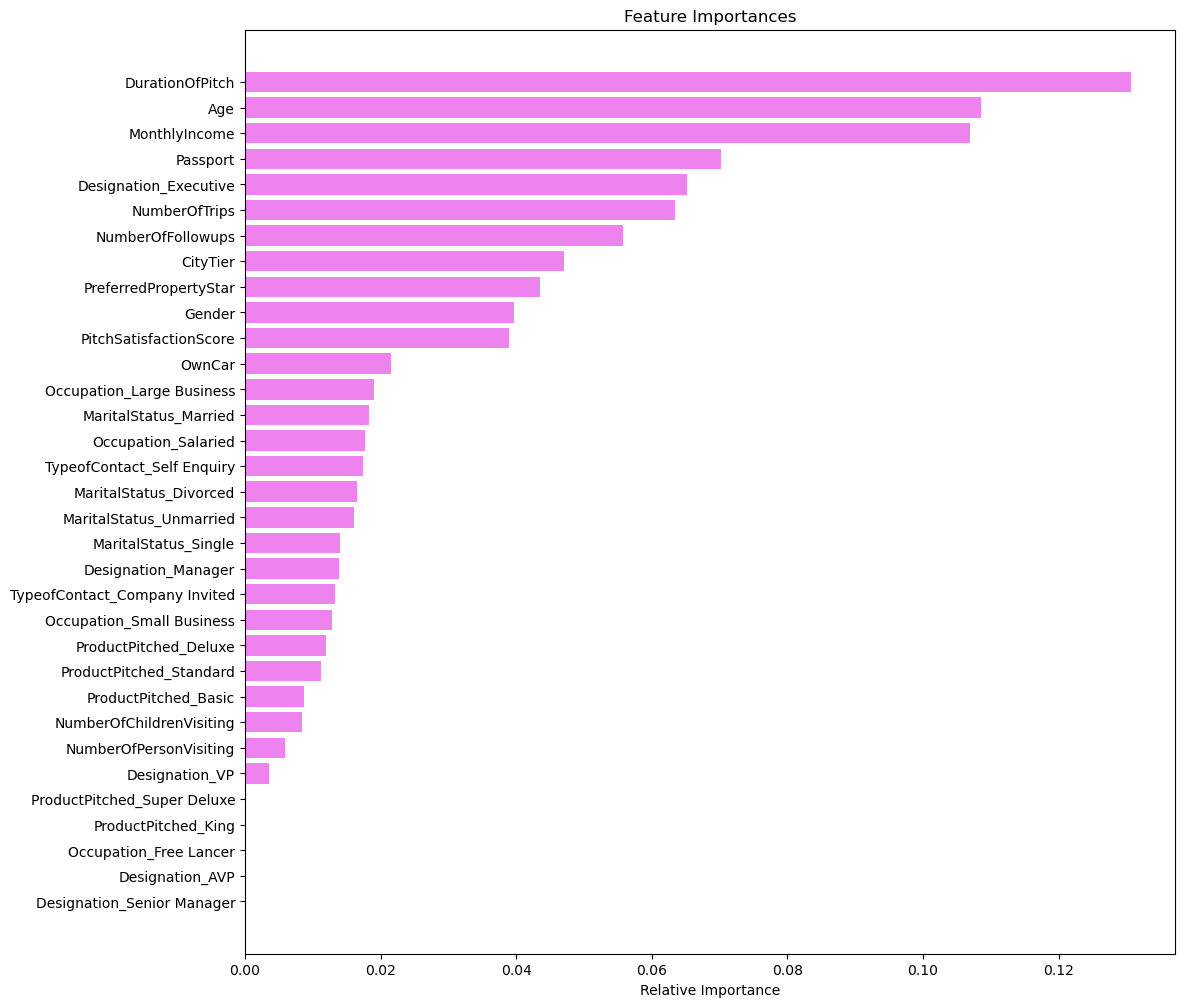

In [179]:
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [180]:
####Hyperparameter tuning on Decision Tree

# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from

parameters = {
    "max_depth": [np.arange(2, 50, 5), None],
    "criterion": ["entropy", "gini"],
    "splitter": ["best", "random"],
    "min_impurity_decrease": [0.000001, 0.00001, 0.0001],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(min_impurity_decrease=1e-06, random_state=1)

In [181]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(
    estimator, X_train, y_train
)
decision_tree_tune_perf_train

,Accuracy,Recall,Precision,F1
0,1.00,1.00,1.00,1.00


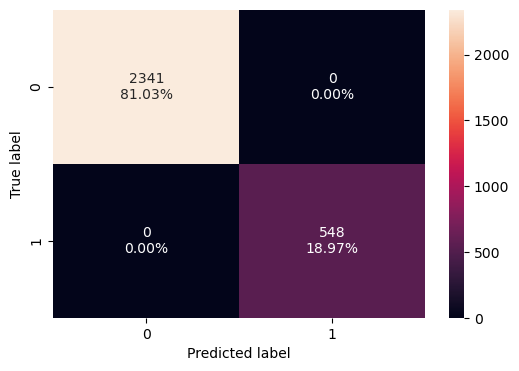

In [182]:
confusion_matrix_sklearn(estimator, X_train, y_train)

In [183]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(
    estimator, X_test, y_test
)

decision_tree_tune_perf_test

,Accuracy,Recall,Precision,F1
0,0.90,0.76,0.76,0.76


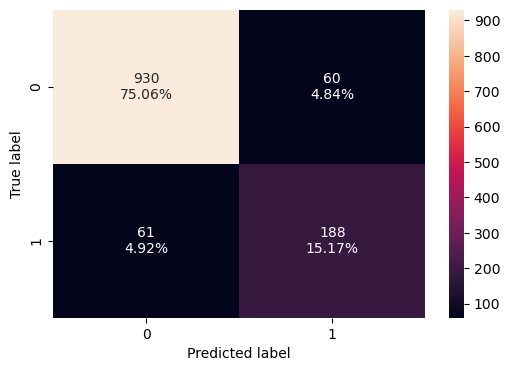

In [184]:
confusion_matrix_sklearn(estimator, X_test, y_test)

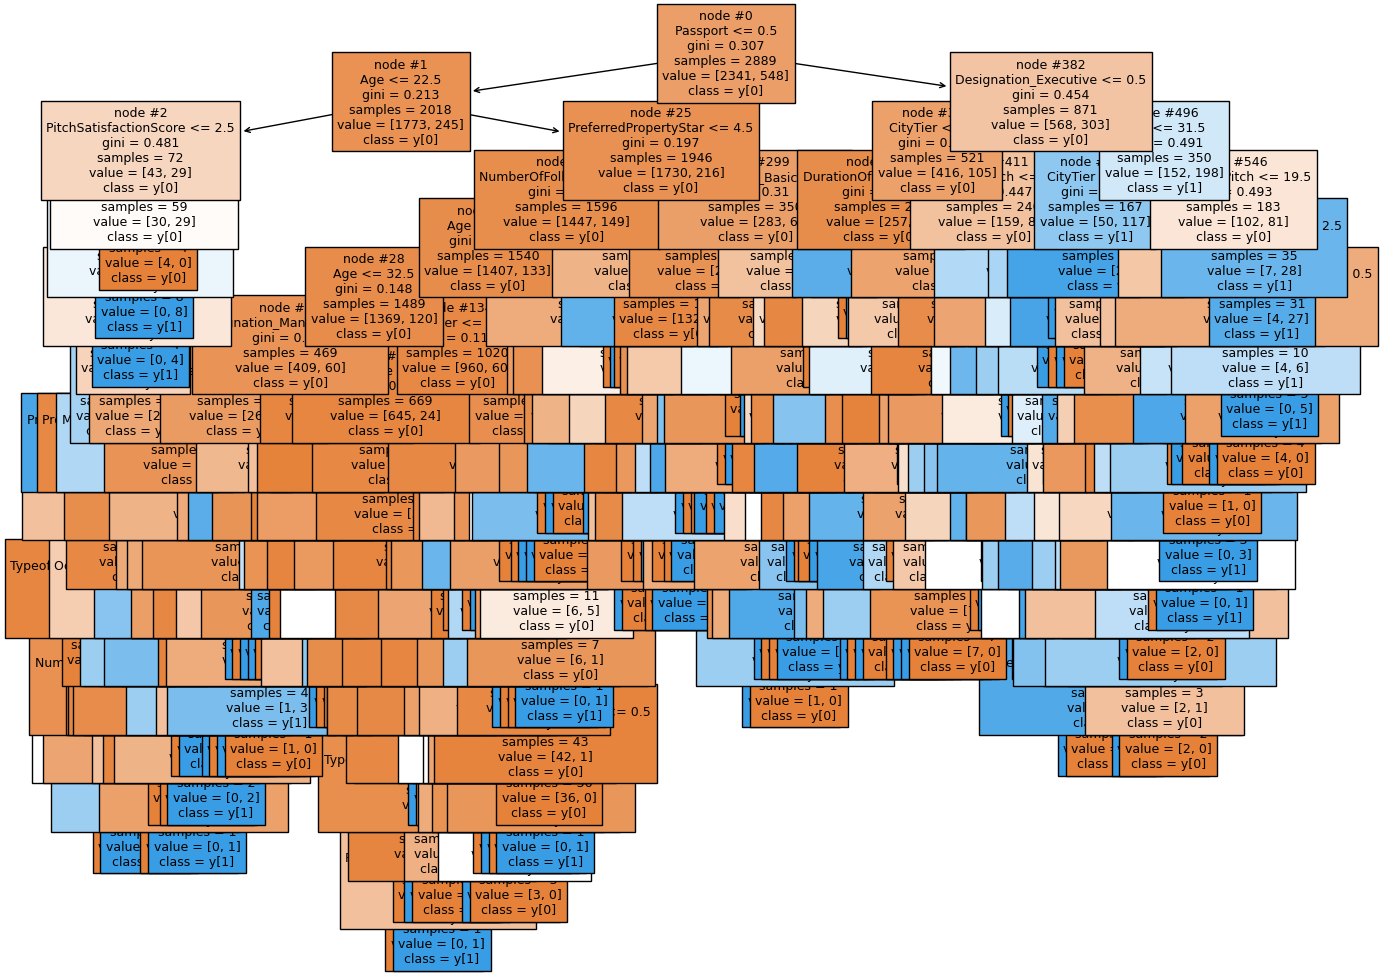

In [185]:
plt.figure(figsize=(15, 12))

tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
plt.show()

In [186]:
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [187]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.00,0.00
1,0.00,0.00
2,0.00,0.00
3,0.00,0.00
4,0.00,0.00
5,0.00,0.00
6,0.00,0.00
7,0.00,0.00
8,0.00,0.01
9,0.00,0.01


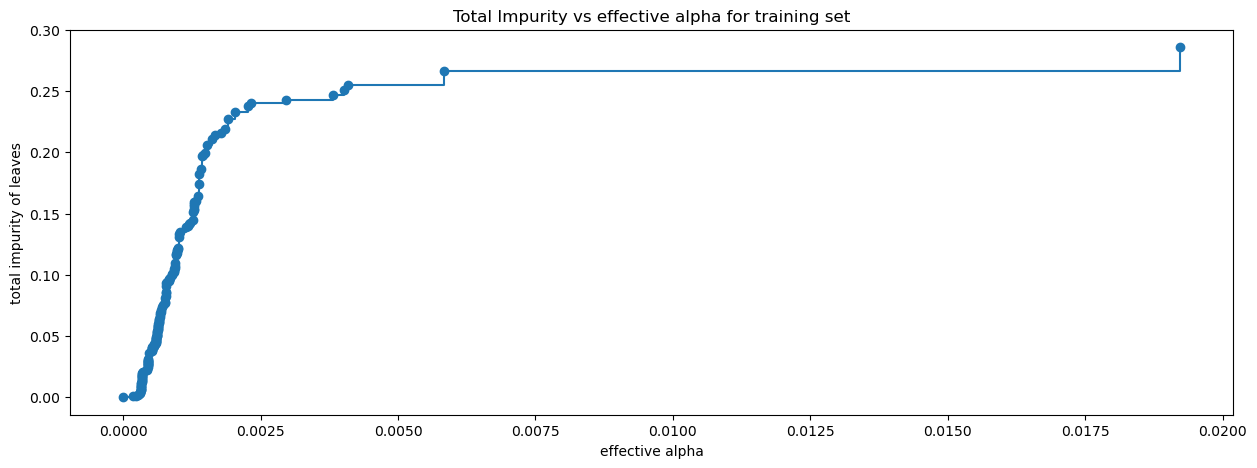

In [188]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [189]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.021601827331998336


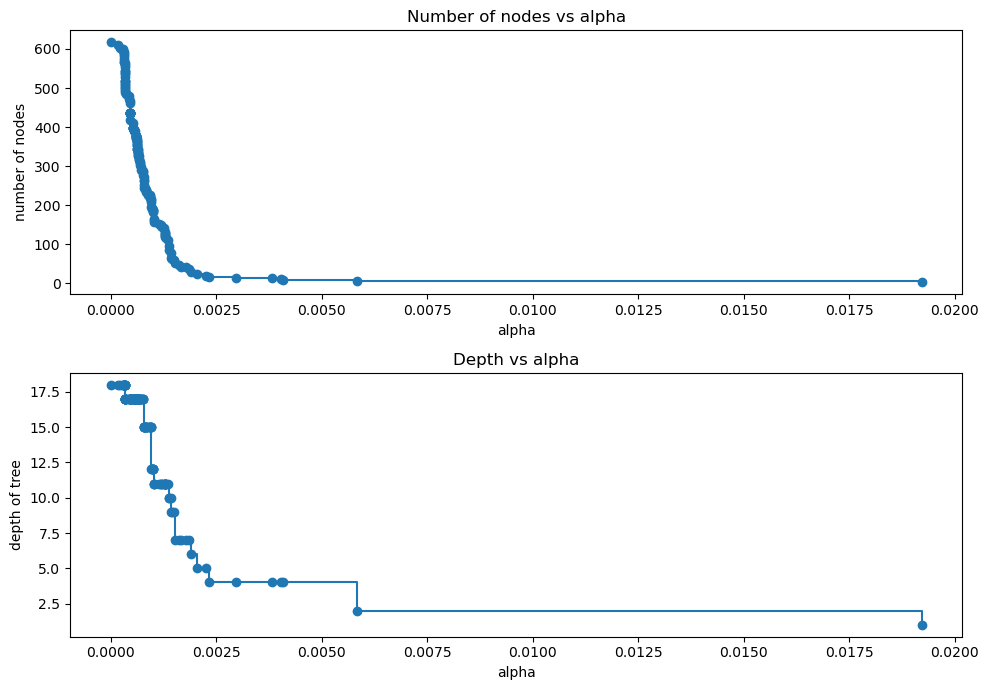

In [190]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [191]:
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

In [192]:
recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

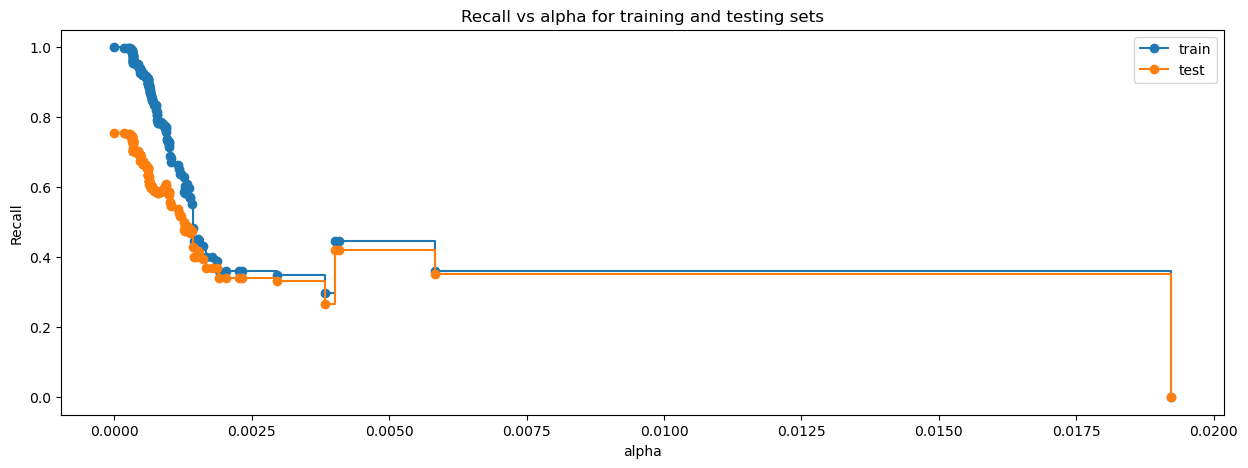

In [193]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [195]:
decision_tree_postpruned_perf_train = model_performance_classification_sklearn(
    best_model, X_train, y_train
)
decision_tree_postpruned_perf_train

,Accuracy,Recall,Precision,F1
0,1.00,1.00,1.00,1.00


In [196]:
decision_tree_postpruned_perf_test = model_performance_classification_sklearn(
    best_model, X_test, y_test
)
decision_tree_postpruned_perf_test

,Accuracy,Recall,Precision,F1
0,0.90,0.76,0.76,0.76


In [197]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train.T,
        decision_tree_tune_perf_train.T,
        decision_tree_postpruned_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree sklearn,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,1.00,1.00,1.00
Recall,1.00,1.00,1.00
Precision,1.00,1.00,1.00
F1,1.00,1.00,1.00


Training performance:
    Accuracy  Recall  Precision   F1
0      1.00    1.00       1.00 1.00
Testing performance:
    Accuracy  Recall  Precision   F1
0      0.90    0.76       0.76 0.76


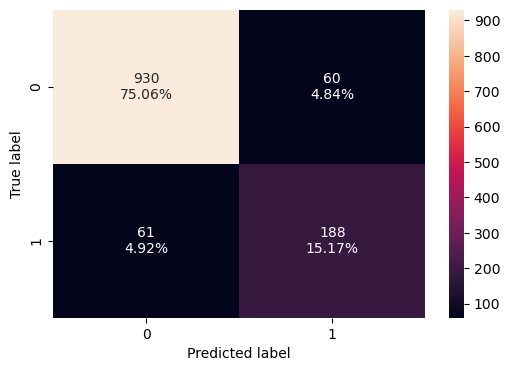

In [244]:
#Fitting the model
d_tree = DecisionTreeClassifier(random_state=1)
d_tree.fit(X_train,y_train)

#Calculating different metrics
d_tree_model_train_perf=model_performance_classification_sklearn(d_tree,X_train,y_train)
print("Training performance:\n",d_tree_model_train_perf)
d_tree_model_test_perf=model_performance_classification_sklearn(d_tree,X_test,y_test)
print("Testing performance:\n",d_tree_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(d_tree,X_test,y_test)

Training performance:
    Accuracy  Recall  Precision   F1
0      1.00    1.00       1.00 1.00
Testing performance:
    Accuracy  Recall  Precision   F1
0      0.91    0.57       0.95 0.71


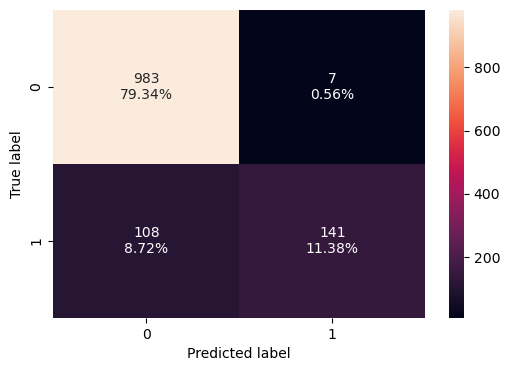

In [198]:
######. Building a Random Forrest Model

#Fitting the model
rf_estimator = RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train,y_train)

#Calculating different metrics
rf_estimator_model_train_perf=model_performance_classification_sklearn(rf_estimator,X_train,y_train)
print("Training performance:\n",rf_estimator_model_train_perf)
rf_estimator_model_test_perf=model_performance_classification_sklearn(rf_estimator,X_test,y_test)
print("Testing performance:\n",rf_estimator_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(rf_estimator,X_test,y_test)

In [207]:
# Choose the type of classifier. 
rf_tuned = RandomForestClassifier(class_weight={0:0.18,1:0.82},random_state=1,oob_score=True,bootstrap=True)

parameters = {  
                'max_depth': list(np.arange(5,30,5)) + [None]
     ,
                 'max_features': ['sqrt','log2',None]
    ,
                 'min_samples_leaf': np.arange(1,15,5)
    ,
                'min_samples_split': np.arange(2, 20, 5)}


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer, cv=5,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
rf_tuned.fit(X_train, y_train)




RandomForestClassifier(class_weight={0: 0.18, 1: 0.82}, max_depth=20,
                       max_features=None, min_samples_split=7, oob_score=True,
                       random_state=1)

Training performance:
    Accuracy  Recall  Precision   F1
0      1.00    0.99       0.98 0.99
Testing performance:
    Accuracy  Recall  Precision   F1
0      0.90    0.65       0.83 0.73


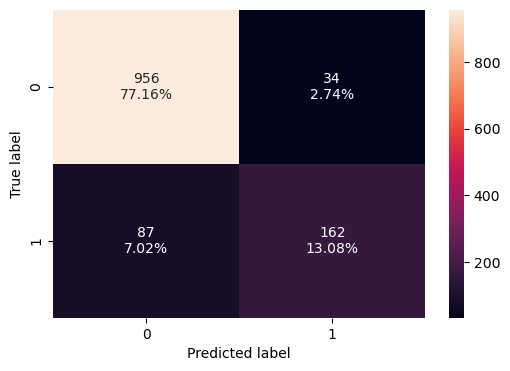

In [208]:
#Calculating different metrics
rf_tuned_model_train_perf=model_performance_classification_sklearn(rf_tuned,X_train,y_train)
print("Training performance:\n",rf_tuned_model_train_perf)
rf_tuned_model_test_perf=model_performance_classification_sklearn(rf_tuned,X_test,y_test)
print("Testing performance:\n",rf_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(rf_tuned,X_test,y_test)

In [239]:


# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False],
    'min_weight_fraction_leaf': [0.0, 0.1, 0.2]
}

# Create a random forest classifier
rf = RandomForestClassifier()

# Perform grid search cross-validation
grid_search = GridSearchCV(rf, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_

# Get the best decision tree estimator
dtree_estimator = grid_search.best_estimator_
test_accuracy = best_model.score(X_test, y_test)
print("Test Accuracy: ", test_accuracy)


Best Parameters:  {'bootstrap': False, 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100}
Best Score:  0.9155409497880098
Test Accuracy:  0.9289749798224375


DecisionTreeClassifier(class_weight={0: 0.18, 1: 0.72}, random_state=1)

Training performance:
    Accuracy  Recall  Precision   F1
0      1.00    1.00       1.00 1.00
Testing performance:
    Accuracy  Recall  Precision   F1
0      0.88    0.70       0.70 0.70


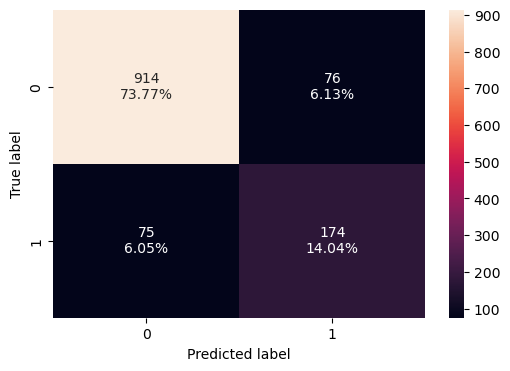

In [238]:
#Calculating different metrics
dtree_estimator_model_train_perf=model_performance_classification_sklearn(dtree_estimator,X_train,y_train)
print("Training performance:\n",dtree_estimator_model_train_perf)
dtree_estimator_model_test_perf=model_performance_classification_sklearn(dtree_estimator,X_test,y_test)
print("Testing performance:\n",dtree_estimator_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(dtree_estimator,X_test,y_test)

### Observations 
1. The decisions tree was clearly overfit.  When we used the test model the accurakcy was only about 76%, which isn't terrible, but not great
2. Using Random Forrest produced much more reliable results.  While the training data. set was 99% which is pretty high, and possbily over fit, the Accuracy is 92% which is far better than the decision tree.

In [210]:
# Choose the type of classifier. 
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {'max_samples': [0.7,0.8,0.9,1], 
              'max_features': [0.7,0.8,0.9,1],
              'n_estimators' : [10,20,30,40,50],
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.9, max_samples=0.9, n_estimators=50,
                  random_state=1)

   Accuracy  Recall  Precision   F1
0      0.99    0.97       1.00 0.98
   Accuracy  Recall  Precision   F1
0      0.91    0.59       0.91 0.72


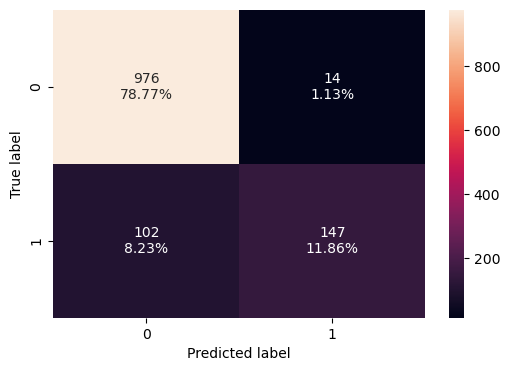

In [246]:
#Fitting the model
bagging_classifier = BaggingClassifier(random_state=1)
bagging_classifier.fit(X_train,y_train)

#Calculating different metrics
bagging_classifier_model_train_perf=model_performance_classification_sklearn(bagging_classifier,X_train,y_train)
print(bagging_classifier_model_train_perf)
bagging_classifier_model_test_perf=model_performance_classification_sklearn(bagging_classifier,X_test,y_test)
print(bagging_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(bagging_classifier,X_test,y_test)

   Accuracy  Recall  Precision   F1
0      1.00    1.00       1.00 1.00
   Accuracy  Recall  Precision   F1
0      0.92    0.64       0.95 0.77


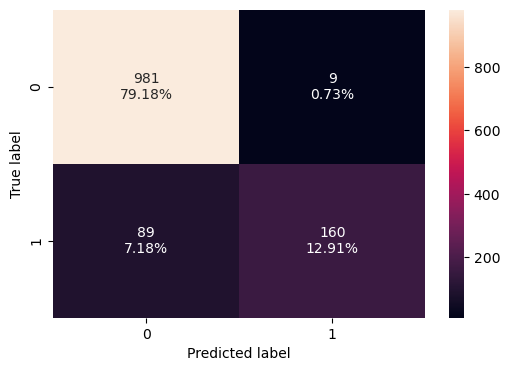

In [248]:
#Calculating different metrics
bagging_estimator_tuned_model_train_perf=model_performance_classification_sklearn(bagging_estimator_tuned,X_train,y_train)
print(bagging_estimator_tuned_model_train_perf)
bagging_estimator_tuned_model_test_perf=model_performance_classification_sklearn(bagging_estimator_tuned,X_test,y_test)
print(bagging_estimator_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(bagging_estimator_tuned,X_test,y_test)

   Accuracy  Recall  Precision   F1
0      0.85    0.36       0.71 0.48
   Accuracy  Recall  Precision   F1
0      0.84    0.37       0.70 0.48


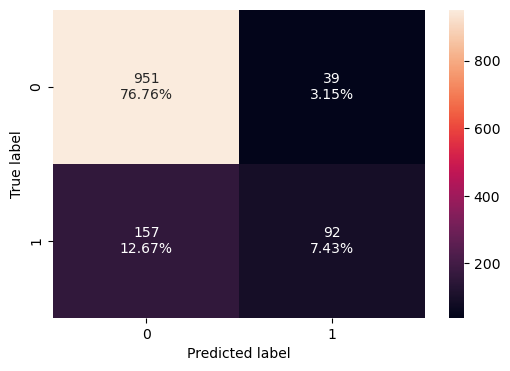

In [211]:
#Fitting the model -- ADABOOOST
ab_classifier = AdaBoostClassifier(random_state=1)
ab_classifier.fit(X_train,y_train)

#Calculating different metrics
ab_classifier_model_train_perf=model_performance_classification_sklearn(ab_classifier,X_train,y_train)
print(ab_classifier_model_train_perf)
ab_classifier_model_test_perf=model_performance_classification_sklearn(ab_classifier,X_test,y_test)
print(ab_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(ab_classifier,X_test,y_test)

In [222]:
# Choose the type of classifier. 
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {  'max_samples': [0.7,0.8,0.9,1], 
              'max_features': [0.7,0.8,0.9,1],
              'n_estimators' : [10,20,30,40,50]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.9, max_samples=0.9, n_estimators=50,
                  random_state=1)

   Accuracy  Recall  Precision   F1
0      1.00    1.00       1.00 1.00
   Accuracy  Recall  Precision   F1
0      0.90    0.64       0.81 0.71


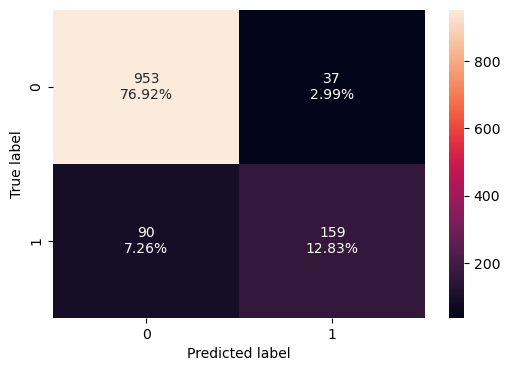

In [223]:
#Calculating different metrics
abc_tuned_model_train_perf=model_performance_classification_sklearn(abc_tuned,X_train,y_train)
print(abc_tuned_model_train_perf)
abc_tuned_model_test_perf=model_performance_classification_sklearn(abc_tuned,X_test,y_test)
print(abc_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(abc_tuned,X_test,y_test)

Training performance:
    Accuracy  Recall  Precision   F1
0      0.90    0.51       0.90 0.65
Testing performance:
    Accuracy  Recall  Precision   F1
0      0.86    0.39       0.79 0.52


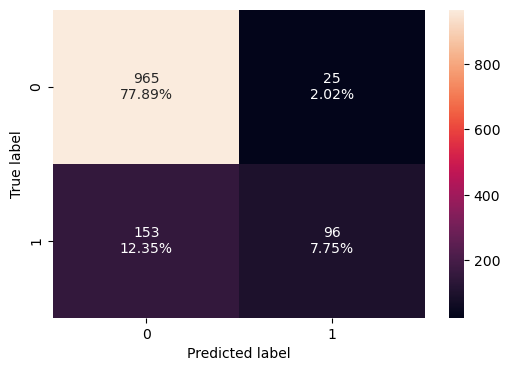

In [226]:
#Fitting the model
gb_classifier = GradientBoostingClassifier(random_state=1)
gb_classifier.fit(X_train,y_train)

#Calculating different metrics
gb_classifier_model_train_perf=model_performance_classification_sklearn(gb_classifier,X_train,y_train)
print("Training performance:\n",gb_classifier_model_train_perf)
gb_classifier_model_test_perf=model_performance_classification_sklearn(gb_classifier,X_test,y_test)
print("Testing performance:\n",gb_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(gb_classifier,X_test,y_test)

In [227]:
# Choose the type of classifier. 
gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [100,150,200,250],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.9, n_estimators=250, random_state=1,
                           subsample=0.8)

Training performance:
    Accuracy  Recall  Precision   F1
0      0.93    0.70       0.95 0.80
Testing performance:
    Accuracy  Recall  Precision   F1
0      0.88    0.49       0.82 0.61


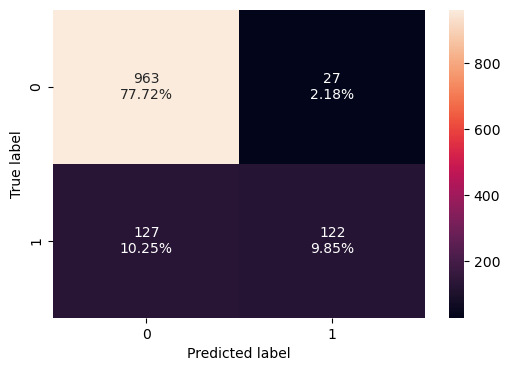

In [228]:
#Calculating different metrics
gbc_tuned_model_train_perf=model_performance_classification_sklearn(gbc_tuned,X_train,y_train)
print("Training performance:\n",gbc_tuned_model_train_perf)
gbc_tuned_model_test_perf=model_performance_classification_sklearn(gbc_tuned,X_test,y_test)
print("Testing performance:\n",gbc_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(gbc_tuned,X_test,y_test)

Training performance:
    Accuracy  Recall  Precision   F1
0      1.00    1.00       1.00 1.00
Testing performance:
    Accuracy  Recall  Precision   F1
0      0.93    0.69       0.95 0.80


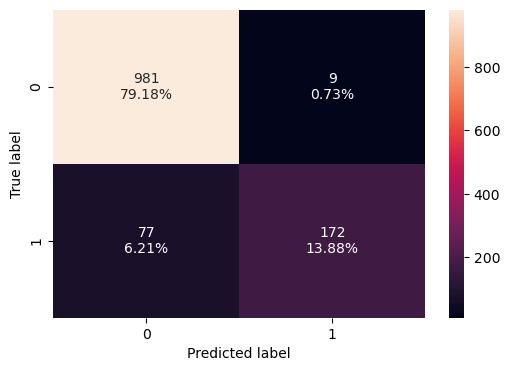

In [229]:
#Fitting the model
xgb_classifier = XGBClassifier(random_state=1, eval_metric='logloss')
xgb_classifier.fit(X_train,y_train)

#Calculating different metrics
xgb_classifier_model_train_perf=model_performance_classification_sklearn(xgb_classifier,X_train,y_train)
print("Training performance:\n",xgb_classifier_model_train_perf)
xgb_classifier_model_test_perf=model_performance_classification_sklearn(xgb_classifier,X_test,y_test)
print("Testing performance:\n",xgb_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(xgb_classifier,X_test,y_test)

In [230]:
# Choose the type of classifier. 
xgb_tuned = XGBClassifier(random_state=1, eval_metric='logloss')

# Grid of parameters to choose from
parameters = {
    "n_estimators": [10,30,50],
    "scale_pos_weight":[1,2,5],
    "subsample":[0.7,0.9,1],
    "learning_rate":[0.05, 0.1,0.2],
    "colsample_bytree":[0.7,0.9,1],
    "colsample_bylevel":[0.5,0.7,1]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters,scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=1, colsample_bynode=None, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', feature_types=None, gamma=None,
              gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=50, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=1, ...)

Training performance:
    Accuracy  Recall  Precision   F1
0      0.99    1.00       0.95 0.98
Testing performance:
    Accuracy  Recall  Precision   F1
0      0.90    0.75       0.75 0.75


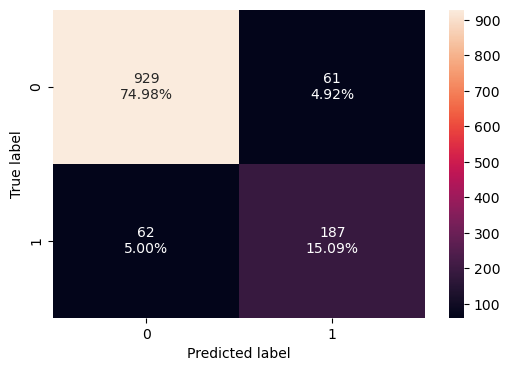

In [231]:
#Calculating different metrics
xgb_tuned_model_train_perf=model_performance_classification_sklearn(xgb_tuned,X_train,y_train)
print("Training performance:\n",xgb_tuned_model_train_perf)
xgb_tuned_model_test_perf=model_performance_classification_sklearn(xgb_tuned,X_test,y_test)
print("Testing performance:\n",xgb_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(xgb_tuned,X_test,y_test)

In [241]:
# Libraries to import decision tree classifier and different ensemble classifiers
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier

estimators = [('Random Forest',rf_tuned), ('Gradient Boosting',gbc_tuned), ('AdaBoost',abc_tuned)]

final_estimator = xgb_tuned

stacking_classifier= StackingClassifier(estimators=estimators,final_estimator=final_estimator)

stacking_classifier.fit(X_train,y_train)

StackingClassifier(estimators=[('Random Forest',
                                RandomForestClassifier(class_weight={0: 0.18,
                                                                     1: 0.82},
                                                       max_depth=20,
                                                       max_features=None,
                                                       min_samples_split=7,
                                                       oob_score=True,
                                                       random_state=1)),
                               ('Gradient Boosting',
                                GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                                                           max_features=0.9,
                                                           n_estimators=250,
                                                           random_state=1,
                                                           subsample=0.8)),
                               ('AdaBoost',
                                AdaB...
                                                 gpu_id=None, grow_policy=None,
                                                 importance_type=None,
                                                 interaction_constraints=None,
                                                 learning_rate=0.2,
                                                 max_bin=None,
                                                 max_cat_threshold=None,
                                                 max_cat_to_onehot=None,
                                                 max_delta_step=None,
                                                 max_depth=None,
                                                 max_leaves=None,
                                                 min_child_weight=None,
                                                 missing=nan,
                                                 monotone_constraints=None,
                                                 n_estimators=50, n_jobs=None,
                                                 num_parallel_tree=None,
                                                 predictor=None, random_state=1, ...))

Training performance:
    Accuracy  Recall  Precision   F1
0      0.98    1.00       0.91 0.95
Testing performance:
    Accuracy  Recall  Precision   F1
0      0.90    0.82       0.73 0.78


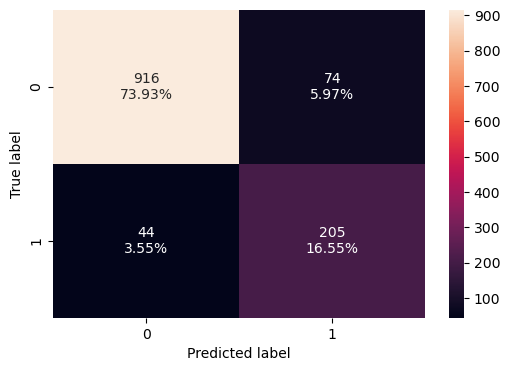

In [242]:
#Calculating different metrics
stacking_classifier_model_train_perf=model_performance_classification_sklearn(stacking_classifier,X_train,y_train)
print("Training performance:\n",stacking_classifier_model_train_perf)
stacking_classifier_model_test_perf=model_performance_classification_sklearn(stacking_classifier,X_test,y_test)
print("Testing performance:\n",stacking_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(stacking_classifier,X_test,y_test)

In [249]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        d_tree_model_train_perf.T,
        dtree_estimator_model_train_perf.T,
        rf_estimator_model_train_perf.T,
        rf_tuned_model_train_perf.T,
     bagging_classifier_model_train_perf.T,
        bagging_estimator_tuned_model_train_perf.T,
        ab_classifier_model_train_perf.T,
     abc_tuned_model_train_perf.T,
        gb_classifier_model_train_perf.T,
        gbc_tuned_model_train_perf.
        T,xgb_classifier_model_train_perf.T,
    xgb_tuned_model_train_perf.T,
        stacking_classifier_model_train_perf.T],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree",
    "Decision Tree Estimator",
    "Random Forest Estimator",
    "Random Forest Tuned",
    "Bagging Classifier",
    "Bagging Estimator Tuned",
    "Adaboost Classifier",
    "Adabosst Classifier Tuned",
    "Gradient Boost Classifier",
    "Gradient Boost Classifier Tuned",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier"]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree,Decision Tree Estimator,Random Forest Estimator,Random Forest Tuned,Bagging Classifier,Bagging Estimator Tuned,Adaboost Classifier,Adabosst Classifier Tuned,Gradient Boost Classifier,Gradient Boost Classifier Tuned,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,1.00,1.00,1.00,1.00,0.99,1.00,0.85,1.00,0.90,0.93,1.00,0.99,0.98
Recall,1.00,1.00,1.00,0.99,0.97,1.00,0.36,1.00,0.51,0.70,1.00,1.00,1.00
Precision,1.00,1.00,1.00,0.98,1.00,1.00,0.71,1.00,0.90,0.95,1.00,0.95,0.91
F1,1.00,1.00,1.00,0.99,0.98,1.00,0.48,1.00,0.65,0.80,1.00,0.98,0.95


### Conclusions

There are some really good models built here.  Random Forrest, Bagging and XGBoost are pretty good, I would have to lean most towards Random Forest as a predictions model though.

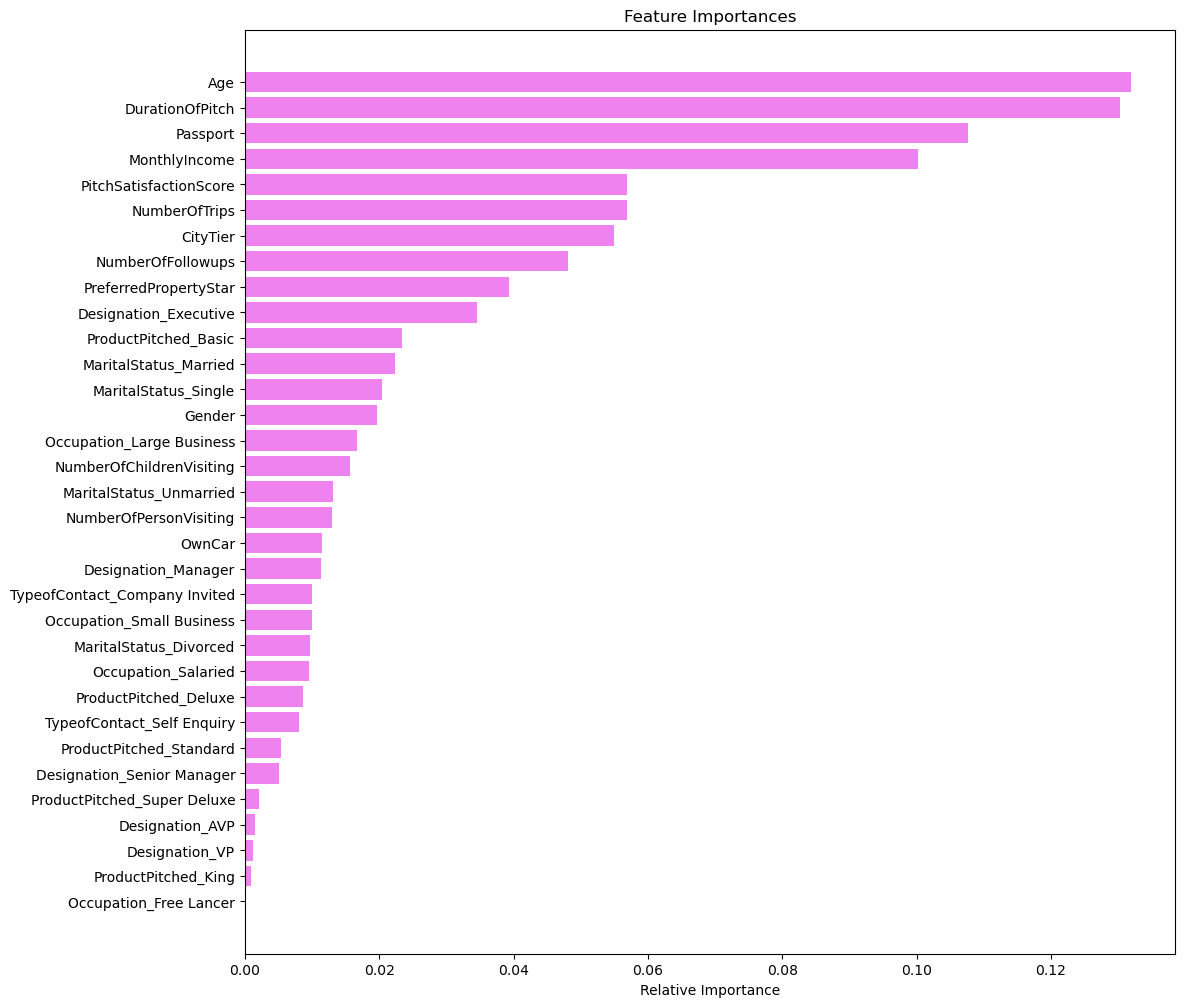

In [250]:
feature_names = X_train.columns
importances = rf_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [270]:
df.groupby(['ProdTaken'])['Age'].mean()

ProdTaken
0   37.93
1   34.33
Name: Age, dtype: float64

In [261]:
df.groupby(['ProdTaken'])['DurationOfPitch'].mean()

ProdTaken
0   15.22
1   17.00
Name: DurationOfPitch, dtype: float64

In [277]:
df.groupby(['ProdTaken'])['MonthlyIncome'].mean()

ProdTaken
0   23378.20
1   21898.13
Name: MonthlyIncome, dtype: float64

In [279]:
print(df.groupby(['ProdTaken'])['PitchSatisfactionScore'].mean(),
      df.groupby(['ProdTaken'])['PitchSatisfactionScore'].min(),
      df.groupby(['ProdTaken'])['PitchSatisfactionScore'].max())
      

ProdTaken
0   3.03
1   3.21
Name: PitchSatisfactionScore, dtype: float64 ProdTaken
0    1
1    1
Name: PitchSatisfactionScore, dtype: int64 ProdTaken
0    5
1    5
Name: PitchSatisfactionScore, dtype: int64


### Recomendations and Conclusions
1. The most valuable variable is the age, and it looks like around 34 years old is the most popular age to purchase trips.
2. The duration is the second most influential variable.  Age and duration of presentation are the most impactful on weither soemone buys the trip or not.  It looks like 17 minutes is the sweet spot for presentation.  So if presentations are focused on people in their early 30's for about 17 minutes, looks like the most promising way to book a sale.
3. Monthly Income of course is a big contribputing factor to if someone books a sale or not.  It looks like people that earn close to 22k per month book a trip, but that number is very close to the income people make that do not book a trip, so income needs to be evaluated further.
4. The fourth most influential variable is presentation satisfation, but it seems like both people that book and don't book a presentation both rate about a 3, which is an average presentation, so if the company focuses on the age and duration of pitch, they are most likely to see an increase in sales
